# Import Dataset

In [1]:
# To show the python version
import sys
assert sys.version_info >= (3,8)
print(sys.version_info)

# to show all the output from a code chunk
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# matplotlib for plotting
from matplotlib import pyplot as plt
%matplotlib inline

# Other external libraries like pandas and numpy
import pandas as pd
import numpy as np
np.random.seed(999)

# machine learning models
import sklearn
print(sklearn.__version__)

#import others
from sklearn.metrics import confusion_matrix
from sklearn import model_selection, datasets
from sklearn.tree import DecisionTreeClassifier
import joblib
import pickle
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

sys.version_info(major=3, minor=10, micro=11, releaselevel='final', serial=0)
1.1.1


In [2]:
from scipy.io import arff
# Load the arff file
header_info = arff.loadarff("Dataset/KDDTrain+.arff")
df = pd.DataFrame(header_info[0])
header_names = df.columns.values.tolist()
header_names.append('Difficulty')
kdd_train = pd.read_csv('Dataset/KDDTrain+.txt', delimiter = ',', header = None)

In [3]:
#Rename the headers
kdd_train.columns = header_names
#Drop the target variables
kdd_train_x = kdd_train.drop(['class', 'Difficulty'], axis = 1)

In [4]:
np.std(kdd_train_x)

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


duration                       2.604505e+03
src_bytes                      5.870308e+06
dst_bytes                      4.021253e+06
land                           1.408602e-02
wrong_fragment                 2.535290e-01
urgent                         1.436597e-02
hot                            2.149960e+00
num_failed_logins              4.523896e-02
logged_in                      4.890081e-01
num_compromised                2.394195e+01
root_shell                     3.660270e-02
su_attempted                   4.515420e-02
num_root                       2.439952e+01
num_file_creations             4.839331e-01
num_shells                     2.218104e-02
num_access_files               9.936916e-02
num_outbound_cmds              0.000000e+00
is_host_login                  2.817472e-03
is_guest_login                 9.661194e-02
count                          1.145082e+02
srv_count                      7.263555e+01
serror_rate                    4.464539e-01
srv_serror_rate                4

In [5]:
#num_outbound_cmds is zero variance descriptor, hence remove it
kdd_train_x = kdd_train_x.drop(['num_outbound_cmds'],axis =1)
y = ['class']
kdd_train_y = kdd_train[y]

#Identify categorical features
num_cols = kdd_train_x._get_numeric_data().columns
cate_cols = list(set(kdd_train_x.columns) - set(num_cols))

from sklearn.preprocessing import StandardScaler
std = StandardScaler()

#One-Hot Encoding the categorical features
cate_features = pd.get_dummies(kdd_train_x[cate_cols], prefix = cate_cols)
one_hot_data = kdd_train_x.drop(cate_cols, axis = 1)
#Standard Scaler on numeric data
std_fit = std.fit(one_hot_data)
array_ss = std_fit.transform(one_hot_data)
one_hot_data_c = pd.DataFrame(array_ss,columns=[num_cols])
one_hot_data_ss = pd.concat([one_hot_data_c, cate_features], axis = 1)
data_array_ss = np.array(one_hot_data_ss)
data_array_ss.shape    # Make sure that the Numpy array dimension is consistent with the Pandas Dataframe
# function to calculate mahalanobis distance

(125973, 121)

In [6]:
kdd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [7]:
one_hot_data_c

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0.734343,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387


In [8]:
one_hot_data_ss

,"(duration,)","(src_bytes,)","(dst_bytes,)","(land,)","(wrong_fragment,)","(urgent,)","(hot,)","(num_failed_logins,)","(logged_in,)","(num_compromised,)",...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,0,0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,0
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,0
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,0,0
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,0


In [9]:
label_map = {"normal": 0,
            "neptune": 1,
            "satan": 1,
            "ipsweep": 1,
            "portsweep": 1,
            "smurf": 1,
            "nmap": 1,
            "back": 1,
            "teardrop": 1,
            "warezclient": 1,
            "pod": 1,
            "guess_passwd": 1,
            "buffer_overflow": 1,
            "warezmaster": 1,
            "land": 1,
            "imap": 1,
            "rootkit": 1,
            "loadmodule": 1,
            "ftp_write": 1,
            "multihop": 1,
            "phf": 1,
            "perl": 1, 
            "spy": 1}
kdd_train_y["class_binary"] = kdd_train_y["class"].map(label_map)

C:\Users\khxia\AppData\Local\Temp\ipykernel_248\3533821117.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kdd_train_y["class_binary"] = kdd_train_y["class"].map(label_map)


In [10]:
one_hot_data_ss.describe()

,"(duration,)","(src_bytes,)","(dst_bytes,)","(land,)","(wrong_fragment,)","(urgent,)","(hot,)","(num_failed_logins,)","(logged_in,)","(num_compromised,)",...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
count,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,1.259730e+05,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,2.549477e-17,-4.512349e-19,7.614590e-19,-4.794371e-18,4.230328e-19,4.455945e-18,-2.244894e-17,2.989431e-18,1.558171e-17,-6.549957e-18,...,0.018679,0.000024,0.000064,0.005192,0.000079,0.004779,0.006192,0.005469,0.004898,0.005501
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,0.135388,0.004880,0.007969,0.071866,0.008909,0.068964,0.078444,0.073753,0.069813,0.073966
min,-1.102492e-01,-7.762241e-03,-4.918644e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.102492e-01,-7.762241e-03,-4.918644e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.102492e-01,-7.754745e-03,-4.918644e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,-8.092618e-01,-1.166364e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-1.102492e-01,-7.715224e-03,-4.790326e-03,-1.408881e-02,-8.948642e-02,-7.735985e-03,-9.507567e-02,-2.702282e-02,1.235694e+00,-1.166364e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.636428e+01,2.350675e+02,3.257486e+02,7.097831e+01,1.174348e+01,2.088191e+02,3.571955e+01,1.104972e+02,1.235694e+00,3.123689e+02,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
np.count_nonzero(kdd_train_y["class_binary"])
125973 - np.count_nonzero(kdd_train_y["class_binary"])

58630

67343

# PCA

## HyperParameter Tunning for PCA

In [12]:
from sklearn.metrics import make_scorer, f1_score

def scorer_f(estimator, X):   #your own scorer
      return np.mean(estimator.score_samples(X))
parameters_pca = {'n_components' : np.linspace(0.1, 1, num = 22)}    

In [13]:
from sklearn.decomposition import PCA
model_pca = PCA()
idx_rand = np.random.permutation(len(kdd_train_x))
#num_sample = int(0.01*len(kdd_train_x))
num_sample = len(kdd_train_x)
one_hot_data_pca = one_hot_data_ss
one_hot_data_pca_sample = one_hot_data_pca.iloc[idx_rand[:num_sample]]
kdd_train_y_sample = kdd_train_y.iloc[idx_rand[:num_sample]]


In [14]:
f1sc = make_scorer(f1_score, average = 'micro')
randm_src = RandomizedSearchCV(estimator=model_pca, param_distributions = parameters_pca, cv = 3, scoring = f1sc, random_state = 0, return_train_score = True, n_jobs = -1)
model_src = randm_src.fit(one_hot_data_pca, kdd_train_y_sample["class_binary"])

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\decomposition\_pca.py", line 408, in fit
    self._fit(X)
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\decomposition\_pca.py", line 485, in _fit
    return self._fit_truncated(X, n_components, self._fit_svd_solver)
  File "C:\WINDOWS\s

 Results from Random Search 

 The best estimator across ALL searched params:
 PCA(n_components=0.9571428571428572)

 The best score across ALL searched params:
 nan

 The best parameters across ALL searched params:
 {'n_components': 0.9571428571428572}


In [15]:
#Keep best % of variance
model_pca = PCA(n_components=0.9571428571428572,whiten = True)
one_hot_data_pca = model_pca.fit_transform(one_hot_data_ss)

print(one_hot_data_pca.shape)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


(125973, 25)


In [16]:
model_pca = PCA(n_components=25,whiten=True)
new_header =['Variable '+str(i) for i in range(model_pca.n_components)]

    
print(new_header)

['Variable 0', 'Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5', 'Variable 6', 'Variable 7', 'Variable 8', 'Variable 9', 'Variable 10', 'Variable 11', 'Variable 12', 'Variable 13', 'Variable 14', 'Variable 15', 'Variable 16', 'Variable 17', 'Variable 18', 'Variable 19', 'Variable 20', 'Variable 21', 'Variable 22', 'Variable 23', 'Variable 24']


In [17]:
one_hot_data_pca = pd.DataFrame(one_hot_data_pca,columns=new_header)

In [18]:
data_array_pca = np.array(one_hot_data_pca)

# Visualize Data

In [19]:
X_norm = (one_hot_data - one_hot_data.min())/(one_hot_data.max() - one_hot_data.min())
pca_plot = PCA(n_components=2)
transformed = pd.DataFrame(pca_plot.fit_transform(X_norm))
c_binary = kdd_train_y['class_binary']

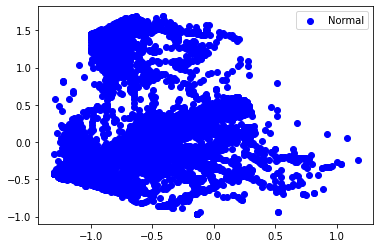

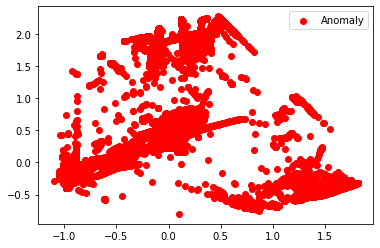

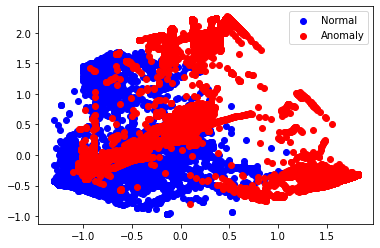

In [20]:
plt.scatter(transformed[c_binary==0][0], transformed[c_binary==0][1], label='Normal', c='blue')

plt.legend()
plt.show()

plt.scatter(transformed[c_binary==1][0], transformed[c_binary==1][1], label='Anomaly', c='red')

plt.legend()
plt.show()


plt.scatter(transformed[c_binary==0][0], transformed[c_binary==0][1], label='Normal', c='blue')
plt.scatter(transformed[c_binary==1][0], transformed[c_binary==1][1], label='Anomaly', c='red')
plt.legend()
plt.show()



In [21]:
one_hot_data_maha = one_hot_data_pca
one_hot_data_if = one_hot_data_pca
one_hot_data_svm = one_hot_data_pca

one_hot_data_maha_ss = one_hot_data_ss
one_hot_data_if_ss = one_hot_data_ss
one_hot_data_svm_ss = one_hot_data_ss

# Mahalanobis

## Standard Scaler Data Before PCA 

In [24]:
#Mahalanobis Distance Training
import scipy as sp
mu_vec = np.mean(data_array_ss,axis = 0)
inv_cormat = sp.linalg.pinv(np.cov(data_array_ss, rowvar=False))

# For loop to get the distance for all the variables
mahal_dist = []

for i in range(data_array_ss.shape[0]):
    x_minus_mu = data_array_ss[i,:] - mu_vec
    left_term = np.dot(x_minus_mu, inv_cormat)
    mahal = np.dot(left_term, x_minus_mu.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)

np.mean(one_hot_data_maha_ss)

from scipy.stats import chi2
one_hot_data_maha_ss['p-value'] = 1 - chi2.cdf(mahal_dist, df = 25) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(one_hot_data_maha_ss['p-value'] < 0.01))

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(duration,)          2.549477e-17
(src_bytes,)        -4.512349e-19
(dst_bytes,)         7.614590e-19
(land,)             -4.794371e-18
(wrong_fragment,)    4.230328e-19
                         ...     
service_urp_i        4.778802e-03
service_uucp         6.191803e-03
service_uucp_path    5.469426e-03
service_vmnet        4.897875e-03
service_whois        5.501179e-03
Length: 121, dtype: float64

363


In [26]:
pvalue_ss = one_hot_data_maha_ss['p-value']
bi_pvalue_ss = pvalue_ss

bi_pvalue_ss = np.where(pvalue_ss < 0.01, 1, bi_pvalue_ss)
bi_pvalue_ss = np.where(pvalue_ss >= 0.01, 0, bi_pvalue_ss)

from sklearn.metrics import accuracy_score

train_acc_maha_ss = accuracy_score(kdd_train_y['class_binary'], bi_pvalue_ss)
print("Training accuracy: {:.4f}".format(train_acc_maha_ss))
cm_maha_ss = confusion_matrix (kdd_train_y["class_binary"], bi_pvalue_ss)
print(cm_maha_ss)

Training accuracy: 0.5336
[[67101   242]
 [58509   121]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, 'Predicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

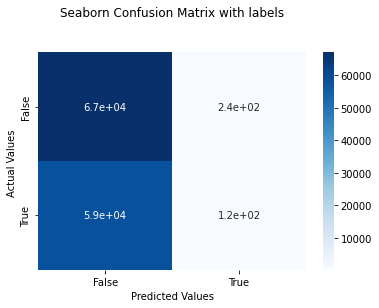

Precision =  0.3333333333333333
Recall =  0.0020637898686679174


In [27]:
ax = sns.heatmap(cm_maha_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_maha = cm_maha_ss[0][0]
FN_maha = cm_maha_ss[1][0]
FP_maha = cm_maha_ss[0][1]
TP_maha = cm_maha_ss[1][1]

##Precision and Recall
Precision_maha_ss = TP_maha/(TP_maha+FP_maha)
Recall_maha_ss = TP_maha/(TP_maha+FN_maha)

print ("Precision = ",Precision_maha_ss)
print ("Recall = ",Recall_maha_ss)


## After PCA

In [28]:
#Use new PCA data for Mahalanobis Distance
mu_vec_pca = np.mean(data_array_pca,axis = 0)
inv_cormat_pca = sp.linalg.pinv(np.cov(data_array_pca, rowvar=False))

# For loop to get the distance for all the variables
mahal_dist = []

for i in range(data_array_pca.shape[0]):
    x_minus_mu_pca = data_array_pca[i,:] - mu_vec_pca
    left_term_pca = np.dot(x_minus_mu_pca, inv_cormat_pca)
    mahal = np.dot(left_term_pca, x_minus_mu_pca.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)

np.mean(one_hot_data_maha)

from scipy.stats import chi2
one_hot_data_maha['p-value'] = 1 - chi2.cdf(mahal_dist, df = 24) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(one_hot_data_maha['p-value'] < 0.01))

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Variable 0    -3.016506e-16
Variable 1    -3.385672e-16
Variable 2    -4.874324e-16
Variable 3     1.780122e-16
Variable 4     4.957944e-17
Variable 5    -1.505574e-16
Variable 6    -5.629156e-17
Variable 7    -2.795400e-16
Variable 8    -1.132600e-16
Variable 9    -4.829624e-17
Variable 10   -4.622338e-17
Variable 11   -1.443952e-17
Variable 12    3.948306e-18
Variable 13    1.156290e-18
Variable 14    1.844423e-17
Variable 15    6.317289e-18
Variable 16   -2.120804e-17
Variable 17    3.299655e-18
Variable 18    7.795084e-17
Variable 19    6.021166e-17
Variable 20   -3.726355e-16
Variable 21    3.559962e-16
Variable 22   -2.779607e-16
Variable 23   -2.345294e-16
Variable 24   -1.969076e-16
dtype: float64

160


In [29]:
pvalue = one_hot_data_maha['p-value']
bi_pvalue = pvalue

bi_pvalue = np.where(pvalue < 0.01, 1, bi_pvalue)
bi_pvalue = np.where(pvalue >= 0.01, 0, bi_pvalue)

from sklearn.metrics import accuracy_score

train_acc_maha = accuracy_score(kdd_train_y['class_binary'], bi_pvalue)
print("Training accuracy: {:.4f}".format(train_acc_maha))
cm_maha = confusion_matrix (kdd_train_y["class_binary"], bi_pvalue)
print(cm_maha)

Training accuracy: 0.5339
[[67223   120]
 [58590    40]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, 'Predicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

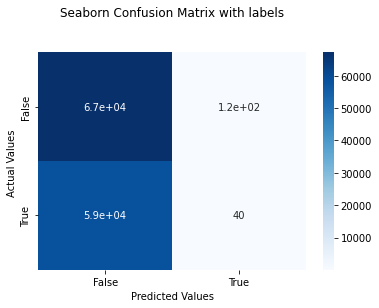

Precision =  0.25
Recall =  0.0006822445846836091


In [30]:
ax = sns.heatmap(cm_maha, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_maha = cm_maha[0][0]
FN_maha = cm_maha[1][0]
FP_maha = cm_maha[0][1]
TP_maha = cm_maha[1][1]

##Precision and Recall
Precision_maha = TP_maha/(TP_maha+FP_maha)
Recall_maha = TP_maha/(TP_maha+FN_maha)

print ("Precision = ",Precision_maha)
print ("Recall = ",Recall_maha)

In [31]:
one_hot_data_pca = one_hot_data_pca.drop(['p-value'], axis =1)

# Minimum Covariance Determinant (MCD)

## Before PCA

In [32]:
from sklearn.covariance import MinCovDet
from sklearn.datasets import make_gaussian_quantiles

rng = np.random.RandomState(42)

In [33]:
one_hot_data_ss = one_hot_data_ss.drop(['p-value'],axis = 1)

In [34]:
# mcd_model_ss = MinCovDet(random_state=42).fit(one_hot_data_ss)
mcd_model_ss = joblib.load('model_mcd_ss.sav')

In [35]:
pickle.dump(mcd_model_ss,open('model_mcd_ss.sav','wb'))

In [36]:
mcd_model_ss.raw_location_.shape

(121,)

In [37]:
np.mean(data_array_ss,axis = 0)
sp.linalg.pinv(np.cov(data_array_ss, rowvar=False))
inv_cormat_mcd_ss = sp.linalg.pinv(mcd_model_ss.covariance_)
mu_vect_mcd_ss = mcd_model_ss.location_
mahal_dist = []
for i in range(data_array_ss.shape[0]):
    x_minus_mu_mcd_ss = data_array_ss[i,:] - mu_vect_mcd_ss
    left_term_mcd_ss = np.dot(x_minus_mu_mcd_ss, inv_cormat_mcd_ss)
    mahal = np.dot(left_term_mcd_ss, x_minus_mu_mcd_ss.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)
    
np.mean(one_hot_data_maha_ss)

from scipy.stats import chi2
one_hot_data_maha_ss['p-value_mcd'] = 1 - chi2.cdf(mahal_dist, df = 121) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(one_hot_data_maha_ss['p-value_mcd'] < 0.01))

array([ 2.54947740e-17, -4.51234938e-19,  7.61458958e-19, -4.79437122e-18,
        4.23032754e-19,  4.45594501e-18, -2.24489382e-17,  2.98943147e-18,
        1.55817065e-17, -6.54995715e-18,  1.75417582e-17, -3.66628387e-19,
        3.58167732e-18, -4.65336030e-18,  3.97650789e-18, -5.30201052e-18,
       -7.33256774e-19,  8.31964417e-18, -3.94830571e-17,  4.16264230e-17,
        4.48414720e-18, -1.23243542e-16,  3.82985654e-17, -1.84724303e-17,
       -1.61880534e-16, -1.71469276e-17, -2.72997138e-17, -1.75699604e-17,
       -5.81529027e-17, -1.21551411e-16, -2.37462386e-17,  2.89918448e-17,
        3.06839758e-17,  1.71187255e-17, -2.63126373e-17,  4.90717995e-17,
        7.74996006e-17,  6.58156907e-02,  8.15166742e-01,  1.19017567e-01,
        3.65157613e-04,  8.91699015e-02,  1.23994824e-02,  8.17635525e-04,
        1.92184039e-02,  2.76654521e-01,  2.89744628e-03,  1.00815254e-03,
        3.88972240e-04,  5.94929072e-01,  2.15125463e-03,  1.48444508e-03,
        5.79489256e-04,  

array([[ 1.56177027e+00, -1.00906473e-01, -2.58064545e-02, ...,
        -2.39108621e-02, -2.17247544e-02, -1.50055933e-02],
       [-1.00906473e-01,  1.04742432e+00,  1.30112677e-03, ...,
        -5.30398147e-03, -5.38390405e-03,  6.57585493e-03],
       [-2.58064545e-02,  1.30112677e-03,  1.00165155e+00, ...,
         3.89815222e-03,  3.86331390e-03,  3.41541620e-03],
       ...,
       [-2.39108621e-02, -5.30398147e-03,  3.89815222e-03, ...,
         2.76165669e+02,  9.30136349e+01,  9.32642642e+01],
       [-2.17247544e-02, -5.38390405e-03,  3.86331390e-03, ...,
         9.30136349e+01,  2.96871966e+02,  9.29503950e+01],
       [-1.50055933e-02,  6.57585493e-03,  3.41541620e-03, ...,
         9.32642642e+01,  9.29503950e+01,  2.75007339e+02]])

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(duration,)          2.549477e-17
(src_bytes,)        -4.512349e-19
(dst_bytes,)         7.614590e-19
(land,)             -4.794371e-18
(wrong_fragment,)    4.230328e-19
                         ...     
service_uucp         6.191803e-03
service_uucp_path    5.469426e-03
service_vmnet        4.897875e-03
service_whois        5.501179e-03
p-value              9.649991e-01
Length: 122, dtype: float64

82663


In [38]:
pvalue_mcd_ss = one_hot_data_maha_ss['p-value_mcd']
bi_pvalue_mcd_ss = pvalue_mcd_ss

bi_pvalue_mcd_ss = np.where(pvalue_mcd_ss < 0.01, 1, bi_pvalue_mcd_ss)
bi_pvalue_mcd_ss = np.where(pvalue_mcd_ss >= 0.01, 0, bi_pvalue_mcd_ss)


In [39]:
from sklearn.metrics import accuracy_score

train_acc_maha_mcd_ss = accuracy_score(kdd_train_y['class_binary'], bi_pvalue_mcd_ss)
print("Training accuracy: {:.4f}".format(train_acc_maha_mcd_ss))
cm_maha_mcd_ss = confusion_matrix (kdd_train_y["class_binary"], bi_pvalue_mcd_ss)
print(cm_maha_mcd_ss)

Training accuracy: 0.7877
[[41954 25389]
 [ 1356 57274]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

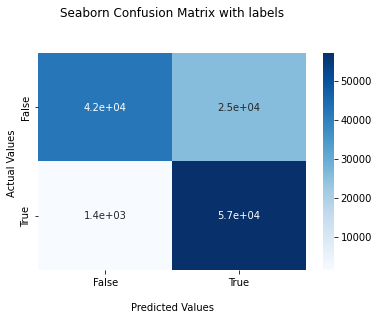

0.6928613769159115
0.9768719085792257


In [40]:
ax = sns.heatmap(cm_maha_mcd_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_maha_mcd = cm_maha_mcd_ss[0][0]
FN_maha_mcd = cm_maha_mcd_ss[1][0]
FP_maha_mcd = cm_maha_mcd_ss[0][1]
TP_maha_mcd = cm_maha_mcd_ss[1][1]

##Precision and Recall
Precision_maha_mcd_ss = TP_maha_mcd/(TP_maha_mcd+FP_maha_mcd)
Recall_maha_mcd_ss = TP_maha_mcd/(TP_maha_mcd+FN_maha_mcd)

print (Precision_maha_mcd_ss)
print (Recall_maha_mcd_ss)

## MCD with PCA

In [41]:
#mcd_model = MinCovDet(random_state=42).fit(one_hot_data_pca)
mcd_model = joblib.load('model_mcd.sav')

In [42]:
pickle.dump(mcd_model,open('model_mcd.sav','wb'))

In [43]:
np.mean(data_array_pca,axis = 0)
sp.linalg.pinv(np.cov(data_array_pca, rowvar=False))
inv_cormat_mcd_pca = sp.linalg.pinv(mcd_model.covariance_)
mu_vect_mcd_pca = mcd_model.location_
mahal_dist = []
for i in range(data_array_pca.shape[0]):
    x_minus_mu_mcd_pca = data_array_pca[i,:] - mu_vect_mcd_pca
    left_term_mcd_pca = np.dot(x_minus_mu_mcd_pca, inv_cormat_mcd_pca)
    mahal = np.dot(left_term_mcd_pca, x_minus_mu_mcd_pca.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)
    
np.mean(one_hot_data_maha)

from scipy.stats import chi2
one_hot_data_maha['p-value_mcd'] = 1 - chi2.cdf(mahal_dist, df = 24) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(one_hot_data_maha['p-value_mcd'] < 0.01))

array([-3.01650556e-16, -3.38567215e-16, -4.87432441e-16,  1.78012183e-16,
        4.95794388e-17, -1.50557357e-16, -5.62915585e-17, -2.79540044e-16,
       -1.13259969e-16, -4.82962395e-17, -4.62233790e-17, -1.44395180e-17,
        3.94830571e-18,  1.15628953e-18,  1.84442281e-17,  6.31728913e-18,
       -2.12080421e-17,  3.29965549e-18,  7.79508356e-17,  6.02116621e-17,
       -3.72635452e-16,  3.55996164e-16, -2.77960722e-16, -2.34529359e-16,
       -1.96907646e-16])

array([[ 1.00000000e+00,  1.35857233e-14, -2.55947187e-15,
        -2.94270313e-14, -6.80225047e-15,  2.70582186e-14,
         1.49397754e-14, -1.19473000e-14,  9.78197590e-16,
         1.54490700e-15, -7.75237777e-15, -1.82680710e-15,
         6.31380039e-16, -5.19091811e-16, -4.19148844e-15,
         1.85426541e-15, -3.33481152e-16,  9.38133207e-16,
         2.17821862e-16,  2.14391292e-15,  1.92669281e-14,
         1.79867663e-14, -1.08904075e-14,  1.54049593e-14,
        -2.24334440e-14],
       [ 1.45879475e-14,  1.00000000e+00, -2.20072608e-14,
         4.69954581e-16,  1.90552677e-14, -3.31429550e-15,
         5.60899128e-14, -2.86062397e-14, -8.39246277e-14,
         4.57039981e-16, -5.03193550e-15,  5.57550772e-15,
        -2.34109749e-15,  1.02648718e-15, -4.04367751e-15,
         1.27560339e-14,  4.75131090e-14, -7.81750164e-15,
        -2.31986014e-14,  1.04495719e-14,  4.15502173e-14,
        -1.64554788e-14,  5.92056375e-15,  2.52431917e-14,
        -4.37150316e-15],
    

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Variable 0    -3.016506e-16
Variable 1    -3.385672e-16
Variable 2    -4.874324e-16
Variable 3     1.780122e-16
Variable 4     4.957944e-17
Variable 5    -1.505574e-16
Variable 6    -5.629156e-17
Variable 7    -2.795400e-16
Variable 8    -1.132600e-16
Variable 9    -4.829624e-17
Variable 10   -4.622338e-17
Variable 11   -1.443952e-17
Variable 12    3.948306e-18
Variable 13    1.156290e-18
Variable 14    1.844423e-17
Variable 15    6.317289e-18
Variable 16   -2.120804e-17
Variable 17    3.299655e-18
Variable 18    7.795084e-17
Variable 19    6.021166e-17
Variable 20   -3.726355e-16
Variable 21    3.559962e-16
Variable 22   -2.779607e-16
Variable 23   -2.345294e-16
Variable 24   -1.969076e-16
p-value        9.966979e-01
dtype: float64

60281


In [44]:
pvalue_mcd = one_hot_data_maha['p-value_mcd']
bi_pvalue_mcd = pvalue_mcd

bi_pvalue_mcd = np.where(pvalue_mcd < 0.01, 1, bi_pvalue_mcd)
bi_pvalue_mcd = np.where(pvalue_mcd >= 0.01, 0, bi_pvalue_mcd)

In [45]:
from sklearn.metrics import accuracy_score

train_acc_maha_mcd = accuracy_score(kdd_train_y['class_binary'], bi_pvalue_mcd)
print("Training accuracy: {:.4f}".format(train_acc_maha_mcd))
cm_maha_mcd = confusion_matrix (kdd_train_y["class_binary"], bi_pvalue_mcd)
print(cm_maha_mcd)

Training accuracy: 0.4860
[[34145 33198]
 [31547 27083]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

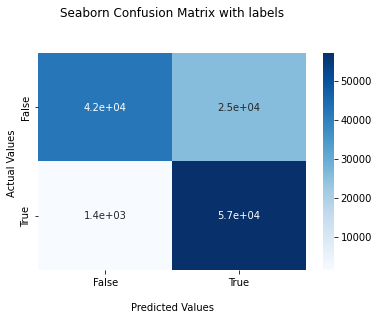

0.44927920903767354
0.4619307521746546


In [46]:
ax = sns.heatmap(cm_maha_mcd_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_maha_mcd = cm_maha_mcd[0][0]
FN_maha_mcd = cm_maha_mcd[1][0]
FP_maha_mcd = cm_maha_mcd[0][1]
TP_maha_mcd = cm_maha_mcd[1][1]

##Precision and Recall
Precision_maha_mcd = TP_maha_mcd/(TP_maha_mcd+FP_maha_mcd)
Recall_maha_mcd = TP_maha_mcd/(TP_maha_mcd+FN_maha_mcd)

print (Precision_maha_mcd)
print (Recall_maha_mcd)

# Isolation Forest
## Before PCA

In [47]:
from sklearn.ensemble import IsolationForest
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
model_if_ss = IsolationForest(random_state = 99)
# parameters = {'n_estimators' : sp_randInt(100, 1000),
#             'contamination' : sp_randFloat(0, 1)
#              }
parameters = {'n_estimators' : [1000,2000,3000,4000,5000,6000],
            'contamination' : np.linspace(0, 0.2, num = 10)
             # 'bootstrap': [True, False]
             }
np.linspace(0, 0.3, num = 10)




array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ])

In [48]:
one_hot_data_if_ss = one_hot_data_if_ss.drop(['p-value','p-value_mcd'],axis = 1)

In [49]:
def scorer_f(estimator, X):   #Scorer function for isolation forest
       return np.mean(estimator.score_samples(one_hot_data_if_ss))
from sklearn.metrics import make_scorer, f1_score
#Set normal to 0 and abnormal to 1 (binary)


In [50]:
# randomly sample
idx_rand = np.random.permutation(len(one_hot_data_if_ss))
num_sample = int(0.01*len(one_hot_data_if_ss))
one_hot_data_if_sample = one_hot_data_if_ss.iloc[idx_rand[:num_sample]]
kdd_train_y_sample = kdd_train_y.iloc[idx_rand[:num_sample]]

In [51]:
one_hot_data_if_ss = pd.DataFrame(one_hot_data_if_ss)

In [52]:
one_hot_data_if_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 121 entries, ('duration',) to service_whois
dtypes: float64(37), uint8(84)
memory usage: 45.7 MB


In [53]:
f1sc = make_scorer(f1_score, average = 'micro')
randm_src = RandomizedSearchCV(estimator=model_if_ss, param_distributions = parameters, cv = 3, scoring = f1sc, random_state = 0, return_train_score = True, n_jobs = -1)
model = randm_src.fit(one_hot_data_if_sample, kdd_train_y_sample["class_binary"])
pickle.dump(model,open('model_rds_if.sav','wb'))

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\ensemble\_iforest.py", line 271, in fit
    raise ValueError(
ValueError: contamination must be in (0, 0.5], got: 0.000000

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\model_selectio

In [54]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 IsolationForest(contamination=0.022222222222222223, n_estimators=6000,
                random_state=99)

 The best score across ALL searched params:
 0.45349660946319653

 The best parameters across ALL searched params:
 {'n_estimators': 6000, 'contamination': 0.022222222222222223}


In [55]:
#model_if_ss = IsolationForest(n_estimators=6000,contamination = 0.022222222222222223, max_features = 1.0)
#model_if_ss = model_if_ss.fit(one_hot_data_if_ss)
model_if_ss = joblib.load('model_if_ss.sav')
pickle.dump(model_if_ss,open('model_if_ss.sav','wb'))

In [56]:
y_pred_if_ss = model_if_ss.predict(one_hot_data_if_ss)

pickle.dump(y_pred_if_ss,open('y_pred_if_ss.sav','wb'))

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [57]:

##y_pred_if_ss = joblib.load('y_pred_if_ss.sav')


In [58]:
y_pred_if_ss = np.where(y_pred_if_ss == -1, 0, y_pred_if_ss)
from sklearn.metrics import accuracy_score
train_acc_if_ss = accuracy_score(kdd_train_y['class_binary'], y_pred_if_ss)
print("Training accuracy: {:.4f}".format(train_acc_if_ss))

Training accuracy: 0.4477


[[ 1218 66125]
 [ 3448 55182]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

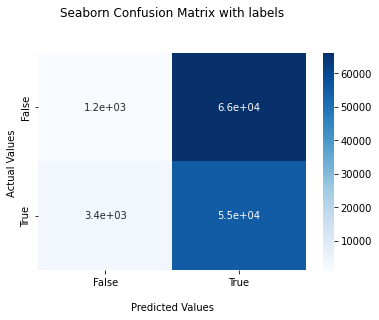

0.4548954306016965
0.9411905168002729


In [59]:
cm_if_ss = confusion_matrix (kdd_train_y["class_binary"], y_pred_if_ss)
print(cm_if_ss)
ax = sns.heatmap(cm_if_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_if = cm_if_ss[0][0]
FN_if = cm_if_ss[1][0]
FP_if = cm_if_ss[0][1]
TP_if = cm_if_ss[1][1]

##Precision and Recall
Precision_if_ss = TP_if/(TP_if+FP_if)
Recall_if_ss = TP_if/(TP_if+FN_if)

print (Precision_if_ss)
print (Recall_if_ss)

# With PCA

In [60]:
one_hot_data_if = one_hot_data_if.drop(['p-value','p-value_mcd'],axis = 1)

In [61]:
#model_if = IsolationForest(n_estimators=6000,contamination = 0.022222222222222223, max_features = 1.0)
#model_if = model_if.fit(one_hot_data_if)
model_if = joblib.load('model_if.sav')
pickle.dump(model_if,open('model_if.sav','wb'))

In [62]:
y_pred_if = model_if.predict(one_hot_data_if)
##y_pred_if = joblib.load('y_pred_if.sav')

In [63]:
y_pred_if = np.where(y_pred_if == -1, 0, y_pred_if)
from sklearn.metrics import accuracy_score
train_acc_if = accuracy_score(kdd_train_y['class_binary'], y_pred_if)
print("Training accuracy: {:.4f}".format(train_acc_if))

Training accuracy: 0.4576


[[  910 66433]
 [ 1890 56740]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

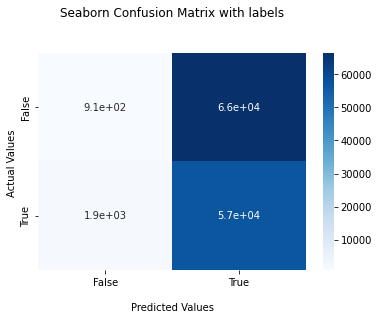

0.4606529028277301
0.9677639433736994


In [64]:
cm_if = confusion_matrix (kdd_train_y["class_binary"], y_pred_if)
print(cm_if)
ax = sns.heatmap(cm_if, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_if = cm_if[0][0]
FN_if = cm_if[1][0]
FP_if = cm_if[0][1]
TP_if = cm_if[1][1]

##Precision and Recall
Precision_if = TP_if/(TP_if+FP_if)
Recall_if = TP_if/(TP_if+FN_if)

print (Precision_if)
print (Recall_if)

# OCSVM
## Without PCA

In [65]:
one_hot_data_svm_ss = one_hot_data_svm_ss.drop(['p-value','p-value_mcd'],axis = 1)

In [66]:

#10% of data, 12597 out of 125973 is used for training.
one_hot_data_svm_ten_percent_ss = one_hot_data_svm_ss[0:12597]
kdd_train_y_ten_percent = kdd_train_y[0:12597]

from scipy.stats import uniform as sp_randFloat
    #Hyperparameter Tuning
from sklearn.svm import OneClassSVM
parameters_svm = {
             "nu" : sp_randFloat()
             }
model_svm_ss = OneClassSVM()

one_hot_data_svm_sample_ss = one_hot_data_svm_ss.iloc[idx_rand[:num_sample]]

In [67]:
one_hot_data_svm_sample_ss

,"(duration,)","(src_bytes,)","(dst_bytes,)","(land,)","(wrong_fragment,)","(urgent,)","(hot,)","(num_failed_logins,)","(logged_in,)","(num_compromised,)",...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
9450,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,0
65765,-0.110249,-0.007735,0.004837,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,0,0
123883,-0.110249,-0.007725,-0.004247,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,0,0
36945,-0.110249,-0.007721,-0.004214,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,0,0
3122,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105166,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,0
40357,-0.110249,-0.007710,-0.002227,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,0,0
113320,-0.110249,-0.007724,-0.004553,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,0,0
72103,-0.110249,-0.007674,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,0,0


In [68]:
def scorer_svm(estimator, X):   #Scorer function for OCSVM
      return np.mean(estimator.score_samples(one_hot_data_svm_ten_percent_ss))
    
#Load the saved random_src result
#randm_src_svm = joblib.load('OCSVMSearch.sav')
randm_src_svm = RandomizedSearchCV(estimator=model_svm_ss, param_distributions = parameters_svm, cv = 3, scoring = f1sc, random_state = 0, return_train_score = True, n_jobs = -1)
model = randm_src_svm.fit(one_hot_data_svm_sample_ss, kdd_train_y_sample["class_binary"])

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src_svm.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src_svm.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src_svm.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 OneClassSVM(nu=0.3834415188257777)

 The best score across ALL searched params:
 0.21840360647043225

 The best parameters across ALL searched params:
 {'nu': 0.3834415188257777}


C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [69]:
model_svm_ss = OneClassSVM(kernel = 'linear', nu=0.3834415188257777)
#0.5488135039273248
import time
start_time = time.time()
model_svm_ss = model_svm_ss.fit(one_hot_data_svm_ten_percent_ss)


C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [70]:
pickle.dump(model_svm_ss,open('model_svm_ss.sav','wb'))

In [71]:

y_pred_svm_ss =model_svm_ss.predict(one_hot_data_svm_ss)
print("--- %s seconds ---" % (time.time() - start_time))

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


--- 36.74105477333069 seconds ---


In [72]:
y_pred_svm_ss

array([ 1,  1,  1, ...,  1, -1, -1], dtype=int64)

In [73]:
y_pred_svm_ss = np.where(y_pred_svm_ss == -1, 0, y_pred_svm_ss)

train_acc_ss = accuracy_score(kdd_train_y['class_binary'], y_pred_svm_ss)
print("Training accuracy: {:.4f}".format(train_acc_ss))
cm_svm_ss = confusion_matrix (kdd_train_y["class_binary"], y_pred_svm_ss)
print(cm_svm_ss)

Training accuracy: 0.4623
[[24426 42917]
 [24823 33807]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

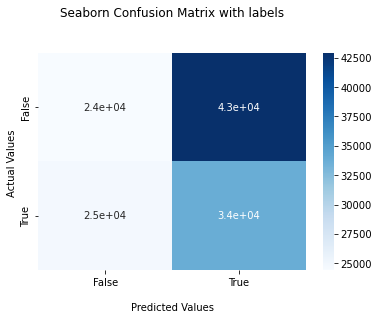

Precision:  0.4406313539440071
Recall 0.5766160668599692


In [74]:
ax = sns.heatmap(cm_svm_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_svm = cm_svm_ss[0][0]
FN_svm = cm_svm_ss[1][0]
FP_svm = cm_svm_ss[0][1]
TP_svm = cm_svm_ss[1][1]


##Precision and Recall
Precision_svm_ss = TP_svm/(TP_svm+FP_svm)
Recall_svm_ss = TP_svm/(TP_svm+FN_svm)

print ("Precision: ",Precision_svm_ss)
print ("Recall",Recall_svm_ss)

## OCSVM (PCA) 

In [75]:
one_hot_data_svm = one_hot_data_svm.drop(['p-value','p-value_mcd'],axis = 1)

In [76]:
one_hot_data_svm_ten_percent = one_hot_data_svm[0:12597]
one_hot_data_svm_sample = one_hot_data_svm.iloc[idx_rand[:num_sample]]

In [77]:
def scorer_svm(estimator, X):   #Scorer function for OCSVM
      return np.mean(estimator.score_samples(one_hot_data_svm_ten_percent))
    
#Load the saved random_src result
#randm_src_svm = joblib.load('OCSVMSearch.sav')
model_svm = OneClassSVM()
randm_src_svm = RandomizedSearchCV(estimator=model_svm, param_distributions = parameters_svm, cv = 3, scoring = f1sc, random_state = 0, return_train_score = True, n_jobs = -1)
model = randm_src_svm.fit(one_hot_data_svm_sample, kdd_train_y_sample["class_binary"])

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src_svm.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src_svm.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src_svm.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 OneClassSVM(nu=0.3834415188257777)

 The best score across ALL searched params:
 0.2843163995908626

 The best parameters across ALL searched params:
 {'nu': 0.3834415188257777}


In [78]:
model_svm = OneClassSVM(kernel = 'linear', nu=0.3834415188257777)
model_svm = model_svm.fit(one_hot_data_svm_ten_percent)


In [79]:
pickle.dump(model_svm,open('model_svm_pca.sav','wb'))

In [80]:
y_pred_svm = model_svm.predict(one_hot_data_svm)

In [81]:
#Evaluation on training result
y_pred_svm = np.where(y_pred_svm == -1, 0, y_pred_svm)

train_acc = accuracy_score(kdd_train_y['class_binary'], y_pred_svm)
print("Training accuracy: {:.4f}".format(train_acc))
cm_svm = confusion_matrix (kdd_train_y["class_binary"], y_pred_svm)
print(cm_svm)

Training accuracy: 0.5031
[[26826 40517]
 [22083 36547]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

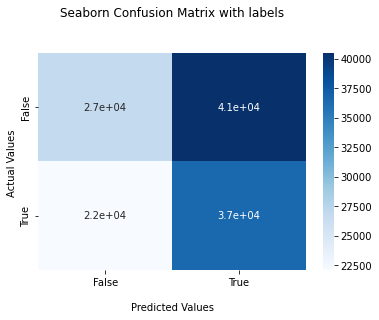

Precision:  0.4742421883110142
Recall 0.6233498209107965


In [82]:
ax = sns.heatmap(cm_svm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_svm = cm_svm[0][0]
FN_svm = cm_svm[1][0]
FP_svm = cm_svm[0][1]
TP_svm = cm_svm[1][1]


##Precision and Recall
Precision_svm = TP_svm/(TP_svm+FP_svm)
Recall_svm = TP_svm/(TP_svm+FN_svm)

print ("Precision: ",Precision_svm)
print ("Recall",Recall_svm)

# K-Means Clustering

In [84]:
one_hot_data_kmean_ss = one_hot_data_ss

In [85]:
one_hot_data_kmean = one_hot_data_pca

In [86]:
from sklearn.cluster import KMeans

In [87]:
kmean_ss = KMeans(n_clusters=2)
kmean = KMeans(n_clusters=2)


In [88]:
kmean_ss = kmean_ss.fit(one_hot_data_kmean_ss)
kmean_result_ss = kmean_ss.labels_

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [89]:
pickle.dump(kmean_ss,open('kmean_ss.sav','wb'))

In [90]:
kmean_result_ss_c = kmean_result_ss

In [91]:
count_1 = np.count_nonzero(kmean_result_ss==1)

In [92]:
count_0 = kmean_result_ss.shape[0] - np.count_nonzero(kmean_result_ss==1)

In [93]:
print(count_0)
print(count_1)
# 1 > 0
kmean_result_ss

91038
34935


array([0, 0, 1, ..., 0, 1, 0])

In [94]:
if(count_1 > count_0):
    kmean_result_ss = np.where(kmean_result_ss_c ==1, 0, kmean_result_ss)
    kmean_result_ss = np.where(kmean_result_ss_c ==0, 1, kmean_result_ss)

In [95]:
kmean_result_ss

array([0, 0, 1, ..., 0, 1, 0])

In [96]:
train_acc_kmean_ss = accuracy_score(kdd_train_y['class_binary'], kmean_result_ss)
print("Training accuracy: {:.4f}".format(train_acc_kmean_ss))
cm_kmean_ss = confusion_matrix (kdd_train_y["class_binary"], kmean_result_ss)
print(cm_kmean_ss)

Training accuracy: 0.8104
[[67248    95]
 [23790 34840]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

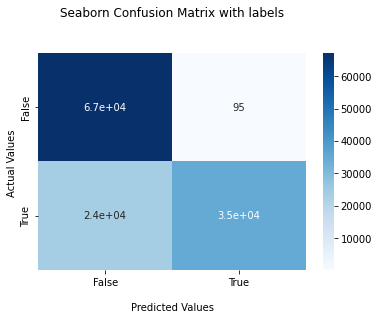

Precision:  0.9972806640904537
Recall 0.5942350332594235


In [97]:
ax = sns.heatmap(cm_kmean_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_kmean = cm_kmean_ss[0][0]
FN_kmean = cm_kmean_ss[1][0]
FP_kmean = cm_kmean_ss[0][1]
TP_kmean = cm_kmean_ss[1][1]


##Precision and Recall
Precision_kmean_ss = TP_kmean/(TP_kmean+FP_kmean)
Recall_kmean_ss = TP_kmean/(TP_kmean+FN_kmean)

print ("Precision: ",Precision_kmean_ss)
print ("Recall",Recall_kmean_ss)

## K-Means (PCA)

In [98]:
kmean.fit(one_hot_data_kmean)
kmean_result = kmean.labels_

KMeans(n_clusters=2)

In [99]:
pickle.dump(kmean,open('kmean.sav','wb'))

In [100]:
kmean_result_c = kmean_result
count_1 = np.count_nonzero(kmean_result==1)
count_0 = kmean_result_ss.shape[0] - np.count_nonzero(kmean_result_ss==0)

In [101]:
count_1
count_0
kmean_result_c

52494

34935

array([0, 0, 0, ..., 1, 0, 1])

In [102]:
if(count_1 > count_0):
    kmean_result = np.where(kmean_result_c ==1, 0, kmean_result)
    kmean_result = np.where(kmean_result_c ==0, 1, kmean_result)

In [103]:
kmean_result

array([1, 1, 1, ..., 0, 1, 0])

In [104]:
train_acc_kmean = accuracy_score(kdd_train_y['class_binary'], kmean_result)
print("Training accuracy: {:.4f}".format(train_acc_kmean))
cm_kmean = confusion_matrix (kdd_train_y["class_binary"], kmean_result)
print(cm_kmean)

Training accuracy: 0.7929
[[46877 20466]
 [ 5617 53013]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

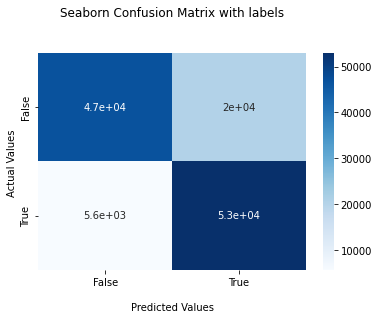

Precision:  0.7214714408198261
Recall 0.9041958041958041


In [105]:
    ax = sns.heatmap(cm_kmean, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()


    ## FP,FN,TP,TN
    TN_kmean = cm_kmean[0][0]
    FN_kmean = cm_kmean[1][0]
    FP_kmean = cm_kmean[0][1]
    TP_kmean = cm_kmean[1][1]


    ##Precision and Recall
    Precision_kmean = TP_kmean/(TP_kmean+FP_kmean)
    Recall_kmean = TP_kmean/(TP_kmean+FN_kmean)

    print ("Precision: ",Precision_kmean)
    print ("Recall",Recall_kmean)

# Comparison of Train Result

# Before PCA

In [106]:
header_cmp = ['Algorithm','accuracy', 'recall', 'precision']
table_cmp = [['Mahalanobis', train_acc_maha_ss, Recall_maha_ss, Precision_maha_ss],
             ['Maha + MCD', train_acc_maha_mcd_ss, Recall_maha_mcd_ss, Precision_maha_mcd_ss],
             ['IF', train_acc_if_ss, Recall_if_ss, Precision_if_ss],
             ['OCSVM', train_acc_ss, Recall_svm_ss, Precision_svm_ss],
             ['Kmean', train_acc_kmean_ss, Recall_kmean_ss, Precision_kmean_ss]]
comparison_ss = pd.DataFrame(table_cmp,columns=header_cmp)
comparison_ss

,Algorithm,accuracy,recall,precision
0,Mahalanobis,0.533622,0.002064,0.333333
1,Maha + MCD,0.787693,0.976872,0.692861
2,IF,0.447715,0.941191,0.454895
3,OCSVM,0.462266,0.576616,0.440631
4,Kmean,0.810396,0.594235,0.997281


# After PCA 

In [107]:
header_cmp = ['Algorithm','accuracy', 'recall', 'precision']
table_cmp = [['Mahalanobis', train_acc_maha, Recall_maha, Precision_maha],
             ['Maha + MCD', train_acc_maha_mcd, Recall_maha_mcd, Precision_maha_mcd],
             ['IF', train_acc_if, Recall_if, Precision_if],
             ['OCSVM', train_acc, Recall_svm, Precision_svm],
             ['Kmean', train_acc_kmean, Recall_kmean, Precision_kmean]]
comparison = pd.DataFrame(table_cmp,columns=header_cmp)
comparison

,Algorithm,accuracy,recall,precision
0,Mahalanobis,0.533948,0.000682,0.250000
1,Maha + MCD,0.486041,0.461931,0.449279
2,IF,0.457638,0.967764,0.460653
3,OCSVM,0.503068,0.623350,0.474242
4,Kmean,0.792948,0.904196,0.721471


# Testing

In [108]:
kdd_test = pd.read_csv('Dataset/KDDTest+.txt', delimiter = ',', header = None)
kdd_test.columns = header_names
kdd_test_x = kdd_test.drop(['class','Difficulty'],axis = 1)

In [109]:
kdd_test_x = kdd_test_x.drop(['num_outbound_cmds'],axis =1)

In [110]:
num_cols = kdd_test_x._get_numeric_data().columns
cate_cols = list(set(kdd_test_x.columns) - set(num_cols))
cate_features = pd.get_dummies(kdd_test_x[cate_cols], prefix = cate_cols)
ss_test_x = kdd_test_x.drop(cate_cols, axis = 1)

In [111]:
kdd_test_x.columns
ss_test_x

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,0,0,0,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,12983,0,0,0,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,20,0,0,0,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,0,15,0,0,0,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,0,1,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,317,938,0,0,0,0,0,1,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,54540,8314,0,0,0,2,0,1,1,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,42,42,0,0,0,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [112]:
std_fit_test = std.fit(ss_test_x)
test_ss = std_fit.transform(ss_test_x)

In [113]:
kdd_test_x = pd.DataFrame(ss_test_x)
columns = kdd_test_x.columns

In [114]:
kdd_test_x_ss = pd.DataFrame(test_ss)

In [115]:
kdd_test_x_ss.columns = columns

In [116]:
pdCat = pd.DataFrame(cate_cols)

In [117]:
cate_pd = kdd_test[['flag','service','protocol_type']]

In [118]:
cate_pd.columns

Index(['flag', 'service', 'protocol_type'], dtype='object')

In [119]:
kdd_test_x_t = pd.concat([kdd_test_x_ss,cate_pd],axis = 1)

In [120]:
kdd_test_y = kdd_test['class']

In [121]:
combine_data = pd.concat([kdd_train_x, kdd_test_x_t])
combine_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,tcp,ftp_data,SF,491.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,150.000000,25.000000,0.170000,0.030000,0.170000,0.000000,0.000000,0.00000,0.050000,0.000000
1,0.000000,udp,other,SF,146.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.000000,0.600000,0.880000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,tcp,private,S0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,26.000000,0.100000,0.050000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000
3,0.000000,tcp,http,SF,232.000000,8153.000000,0.000000,0.000000,0.000000,0.000000,...,30.000000,255.000000,1.000000,0.000000,0.030000,0.040000,0.030000,0.01000,0.000000,0.010000
4,0.000000,tcp,http,SF,199.000000,420.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,tcp,smtp,SF,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.998254,0.002232,0.255414,-0.138370,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483
22540,-0.155534,tcp,http,SF,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,...,0.033292,1.022079,0.898090,-0.410217,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483
22541,-0.155534,tcp,http,SF,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,...,0.650093,1.022079,0.898090,-0.410217,-0.431856,-0.229980,-0.358118,-0.35275,-0.421943,-0.390861
22542,-0.155534,udp,domain_u,SF,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,...,0.650093,0.995240,0.875137,-0.364909,-0.431856,-0.229980,-0.358118,-0.35275,-0.602719,-0.565483


In [123]:

num_cols_test = combine_data._get_numeric_data().columns
cate_cols_test = list(set(combine_data.columns) - set(num_cols))
cate_features_test = pd.get_dummies(combine_data[cate_cols],prefix = cate_cols_test)
combine_one_hot_data = combine_data.drop(cate_cols_test, axis = 1)

In [124]:
pickle.dump(model_pca,open('model_pca.sav','wb'))
model_pca_test = joblib.load('model_pca.sav')


In [125]:
combine_one_hot_data = pd.concat([combine_one_hot_data, cate_features_test], axis = 1)

data_array_test = np.array(combine_one_hot_data)
data_array_test_mcd = np.array(combine_one_hot_data)
data_array_test.shape

(148517, 121)

In [126]:
#Drop the training data
test_one_hot_data = combine_one_hot_data.iloc[125973:,:]
test_one_hot_data_x = test_one_hot_data
test_one_hot_data_ss = test_one_hot_data

In [127]:
test_one_hot_data_x

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,0,0
22540,-0.155534,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,0,0
22541,-0.155534,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,...,0,0,0,0,0,0,0,0,0,0
22542,-0.155534,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0


In [128]:
test_one_hot_data_pca = model_pca_test.fit_transform(test_one_hot_data_x)
new_header =['Variable '+str(i) for i in range(model_pca.n_components)]
test_one_hot_data_pca = pd.DataFrame(test_one_hot_data_pca,columns=new_header)
test_one_hot_data_pca

,Variable 0,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,...,Variable 15,Variable 16,Variable 17,Variable 18,Variable 19,Variable 20,Variable 21,Variable 22,Variable 23,Variable 24
0,1.678471,-0.872735,0.004462,0.120732,-0.347212,0.492001,0.395315,0.513245,-0.766786,-0.062394,...,0.087559,-0.038879,0.089036,0.014807,-0.188965,-0.241500,0.056344,0.496597,0.262535,0.138204
1,1.650825,-0.871036,0.022690,0.353080,-0.343112,0.335960,0.348479,0.469322,-0.854539,-0.026489,...,0.114283,-0.010820,0.145412,-0.009779,-0.598954,-0.375644,0.079031,0.296606,-0.032011,0.186756
2,-0.427776,-0.027269,-0.060373,-0.582328,0.404469,-0.682267,-0.200591,-0.123556,-0.589345,0.143091,...,0.237438,0.104160,0.405106,-0.178831,-1.405561,-1.652676,0.167201,-0.245086,-0.561353,0.150038
3,-0.761174,-0.208430,-0.118920,-1.318459,0.976188,-3.314351,0.566546,1.467813,-0.909150,-0.158967,...,-0.645065,0.286518,-1.667154,0.537779,-0.640795,0.353723,-0.069583,-0.619479,0.387528,0.831724
4,0.598909,-0.747321,0.025752,0.710066,-0.131553,-1.442168,0.498369,0.965455,-0.426953,-0.115364,...,-0.743817,0.298524,-1.560845,0.244328,0.749042,-1.549601,-0.039347,-1.910045,1.245585,-1.708141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.677682,-0.135917,-0.011245,0.455168,-0.042929,-0.256884,-0.100001,-0.189835,0.184557,-0.148046,...,0.292904,0.011649,0.372109,-0.168500,0.037980,-0.879584,0.102358,0.689768,0.934646,0.090175
22540,-0.872991,-0.194655,-0.066623,0.452831,-0.413141,0.185445,0.112065,0.035403,0.523128,-0.197381,...,0.052441,0.030962,0.042610,-0.075227,0.008424,0.335099,-0.003818,-0.023344,0.180433,0.502189
22541,-0.814737,-0.235138,0.074933,0.712311,0.369909,0.794684,-0.066708,0.487747,0.673540,0.041892,...,-0.258330,-0.006817,-0.122758,-0.063017,-0.370471,0.833983,-0.274270,-0.387862,-0.042794,0.810304
22542,-0.618400,-0.099512,-0.112588,-0.139796,-0.299245,0.215218,-0.019459,-0.011095,0.042120,-0.007059,...,-0.290904,0.188055,-0.449203,0.018747,-1.882968,0.507418,0.082627,-0.368312,0.264881,-2.206890


In [129]:
test_ss

array([[-0.15553409, -0.02198811, -0.09689597, ..., -0.3527496 ,
         1.97979091,  1.9291162 ],
       [-0.15553409, -0.02198811, -0.09689597, ..., -0.3527496 ,
         1.97979091,  1.9291162 ],
       [-0.15411277,  0.0054731 , -0.09689597, ..., -0.3527496 ,
        -0.60271888, -0.56548308],
       ...,
       [-0.15553409,  0.09337309,  0.29492588, ..., -0.3527496 ,
        -0.4219432 , -0.39086113],
       [-0.15553409, -0.02189927, -0.0949166 , ..., -0.3527496 ,
        -0.60271888, -0.56548308],
       [-0.15553409, -0.02198811, -0.09689597, ..., -0.3527496 ,
         0.53358543,  1.9291162 ]])

In [130]:
data_array_test = np.array(test_one_hot_data_pca)
data_array_test_mcd = np.array(test_one_hot_data_pca)
data_array_test_ss = np.array(test_one_hot_data_ss)
data_array_test_ss_mcd = np.array(test_one_hot_data_ss)

In [131]:
test_one_hot_data_maha_ss = test_one_hot_data_ss

In [132]:
test_one_hot_data_maha = test_one_hot_data_pca

In [133]:
kdd_test['class'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [134]:
label_map_test = {"normal": 0,
                    "neptune": 1,
                    "saint": 1,
                    "mscan": 1,
                    "guess_passwd": 1,
                    "smurf": 1,
                    "apache2": 1,
                  "satan": 1,
                  "buffer_overflow":1,
                  "back":1,
                  "warezmaster":1,
                  "snmpgetattack":1,
                  "processtable":1,
                  "pod":1,
                  "httptunnel":1,
                  "nmap":1,
                  "ps":1,
                  "snmpguess":1,
                  "ipsweep":1,
                  "mailbomb":1,
                  "portsweep":1,
                  "multihop":1,
                  "named":1,
                  "sendmail":1,
                  "loadmodule":1,
                  "xterm":1,
                  "worm":1,
                  "teardrop":1,
                  "rootkit":1,
                  "xlock":1,
                  "perl":1,
                  "land":1,
                  "xsnoop":1,
                  "sqlattack":1,
                  "ftp_write":1,
                  "imap":1,
                  "udpstorm":1,
                  "phf":1
                 }
kdd_test_y["class_binary"] = kdd_test["class"].map(label_map_test)

C:\Users\khxia\AppData\Local\Temp\ipykernel_248\3750606382.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kdd_test_y["class_binary"] = kdd_test["class"].map(label_map_test)


In [135]:
kdd_test_y["class_binary"] = kdd_test["class"].map(label_map_test)

In [136]:
kdd_test_y['class_binary']
np.count_nonzero(kdd_test_y['class_binary'])

0        1
1        1
2        0
3        1
4        1
        ..
22539    0
22540    0
22541    1
22542    0
22543    1
Name: class, Length: 22544, dtype: int64

12833

# Mahalanobis Testing (Without PCA)

In [137]:
len(x_minus_mu)

121

In [138]:
#mu_vec_test = np.mean(data_array_test_ss,axis = 0)
#inv_cormat_test = sp.linalg.pinv(np.cov(data_array_test_ss, rowvar=False))




In [139]:


# For loop to get the distance for all the variables
mahal_dist = []

for i in range(data_array_test_ss.shape[0]):
    x_minus_mu_test = data_array_test_ss[i,:] - mu_vec
    left_term_test = np.dot(x_minus_mu_test, inv_cormat)
    mahal = np.dot(left_term_test, x_minus_mu_test.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)

np.mean(test_one_hot_data_maha_ss)

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


duration             2.710552e-17
src_bytes            3.782165e-18
dst_bytes            1.891083e-18
land                 2.521443e-18
wrong_fragment       6.303608e-19
                         ...     
service_urp_i        1.020227e-03
service_uucp         2.217885e-03
service_uucp_path    2.040454e-03
service_vmnet        1.907381e-03
service_whois        1.774308e-03
Length: 121, dtype: float64

In [140]:

from scipy.stats import chi2
test_one_hot_data_maha_ss['p-value'] = 1 - chi2.cdf(mahal_dist, df = 1) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(test_one_hot_data_maha_ss['p-value'] < 0.01))

14871


C:\Users\khxia\AppData\Local\Temp\ipykernel_248\3140115265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_one_hot_data_maha_ss['p-value'] = 1 - chi2.cdf(mahal_dist, df = 1) #pdf(x, degreeOfFreedom = Number of Variables)


In [141]:
# def unique(list1):
 
#     # initialize a null list
#     unique_list = []
 
#     # traverse for all elements
#     for x in list1:
#         # check if exists in unique_list or not
#         if x not in unique_list:
#             unique_list.append(x)
#     # print list
#     for x in unique_list:
#         print (x)

In [142]:
pvalue_test_ss = test_one_hot_data_maha_ss['p-value']
bi_pvalue_test_ss = pvalue_test_ss

bi_pvalue_test_ss = np.where(pvalue_test_ss < 0.01, 1, bi_pvalue_test_ss)
bi_pvalue_test_ss = np.where(pvalue_test_ss >= 0.01, 0, bi_pvalue_test_ss)

from sklearn.metrics import accuracy_score

test_acc_maha_ss = accuracy_score(kdd_test_y['class_binary'], bi_pvalue_test_ss)
print("Training accuracy: {:.4f}".format(test_acc_maha_ss))
cm_maha_test_ss = confusion_matrix (kdd_test_y["class_binary"], bi_pvalue_test_ss)
print(cm_maha_test_ss)

Training accuracy: 0.8932
[[ 7488  2223]
 [  185 12648]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'True'), Text(1.5, 0, 'False')]

[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

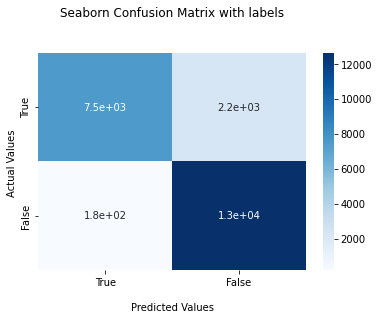

Precision =  0.8505144240468026
Recall =  0.9855840411439258


In [143]:
ax = sns.heatmap(cm_maha_test_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_maha_test = cm_maha_test_ss[0][0]
FN_maha_test = cm_maha_test_ss[1][0]
FP_maha_test = cm_maha_test_ss[0][1]
TP_maha_test = cm_maha_test_ss[1][1]

##Precision and Recall
Precision_maha_test_ss = TP_maha_test/(TP_maha_test+FP_maha_test)
Recall_maha_test_ss = TP_maha_test/(TP_maha_test+FN_maha_test)

print ("Precision = ",Precision_maha_test_ss)
print ("Recall = ",Recall_maha_test_ss)

# Mahalanobis Testing (PCA)

In [144]:
#mu_vec_pca_test = np.mean(data_array_test,axis = 0)
#inv_cormat_pca_test = sp.linalg.pinv(np.cov(data_array_test, rowvar=False))

# For loop to get the distance for all the variables
mahal_dist = []

for i in range(data_array_test_ss.shape[0]):
    x_minus_mu_pca_test = data_array_test[i,:] - mu_vec_pca
    left_term_pca_test = np.dot(x_minus_mu_pca_test, inv_cormat_pca)
    mahal = np.dot(left_term_pca_test, x_minus_mu_pca_test.T)
    mahal = np.sqrt(mahal)
    mahal_dist.append(mahal)

np.mean(test_one_hot_data_maha)

from scipy.stats import chi2
test_one_hot_data_maha['p-value'] = 1 - chi2.cdf(mahal_dist, df = 1) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(test_one_hot_data_maha['p-value'] < 0.01))

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Variable 0    -1.790520e-16
Variable 1    -1.237231e-16
Variable 2     8.123698e-17
Variable 3    -1.476768e-16
Variable 4     3.201870e-16
Variable 5     2.171692e-16
Variable 6    -2.578878e-16
Variable 7     1.878943e-16
Variable 8     2.041778e-17
Variable 9    -2.154554e-18
Variable 10   -2.631363e-16
Variable 11   -5.933370e-16
Variable 12    4.236099e-17
Variable 13    2.736455e-16
Variable 14    5.012526e-16
Variable 15    4.764641e-16
Variable 16   -4.978779e-16
Variable 17   -8.257727e-17
Variable 18    1.463570e-16
Variable 19    1.010789e-15
Variable 20   -4.624731e-16
Variable 21   -1.201918e-15
Variable 22   -6.370584e-17
Variable 23   -8.907787e-17
Variable 24   -2.888918e-15
dtype: float64

1159


In [145]:
pvalue_test = test_one_hot_data_maha['p-value']
bi_pvalue_test = pvalue_test

bi_pvalue_test = np.where(pvalue_test < 0.01, 1, bi_pvalue_test)
bi_pvalue_test = np.where(pvalue_test >= 0.01, 0, bi_pvalue_test)

from sklearn.metrics import accuracy_score

test_acc_maha = accuracy_score(kdd_test_y['class_binary'], bi_pvalue_test)
print("Training accuracy: {:.4f}".format(test_acc_maha))
cm_maha_test = confusion_matrix (kdd_test_y["class_binary"], bi_pvalue_test)
print(cm_maha_test)

Training accuracy: 0.4628
[[ 9493   218]
 [11892   941]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'True'), Text(1.5, 0, 'False')]

[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

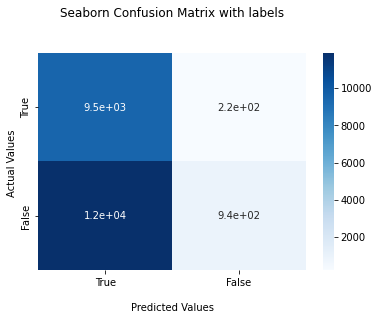

Precision =  0.8119068162208801
Recall =  0.07332657991116652


In [146]:
ax = sns.heatmap(cm_maha_test, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_maha_test = cm_maha_test[0][0]
FN_maha_test = cm_maha_test[1][0]
FP_maha_test = cm_maha_test[0][1]
TP_maha_test = cm_maha_test[1][1]

##Precision and Recall
Precision_maha_test = TP_maha_test/(TP_maha_test+FP_maha_test)
Recall_maha_test = TP_maha_test/(TP_maha_test+FN_maha_test)

print ("Precision = ",Precision_maha_test)
print ("Recall = ",Recall_maha_test)

In [147]:
FP_maha_test

218

# Isolation Forest Testing (Without PCA)

In [148]:
model_if_ss = joblib.load('model_if_ss.sav')

In [149]:
test_one_hot_data_if_ss = test_one_hot_data_ss.drop(['p-value'],axis=1)

In [150]:
test_one_hot_data_if_ss

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,0,0
22540,-0.155534,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,0,0
22541,-0.155534,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,...,0,0,0,0,0,0,0,0,0,0
22542,-0.155534,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0


In [151]:
y_pred_if_test_ss = model_if_ss.predict(test_one_hot_data_if_ss)


C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [152]:
#Evaluation on training result
y_pred_if_test_ss = np.where(y_pred_if_test_ss == -1, 0, y_pred_if_test_ss)

from sklearn.metrics import accuracy_score
test_acc_if_ss = accuracy_score(kdd_test_y['class_binary'], y_pred_if_test_ss)
print("Training accuracy: {:.4f}".format(test_acc_if_ss))

Training accuracy: 0.4557


[[  100  9611]
 [ 2660 10173]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

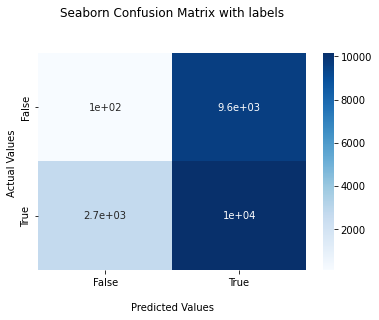

0.5142033966841892
0.7927218888802307


In [153]:
cm_if_test_ss = confusion_matrix (kdd_test_y["class_binary"], y_pred_if_test_ss)
print(cm_if_test_ss)
ax = sns.heatmap(cm_if_test_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_if = cm_if_test_ss[0][0]
FN_if = cm_if_test_ss[1][0]
FP_if = cm_if_test_ss[0][1]
TP_if = cm_if_test_ss[1][1]

##Precision and Recall
Precision_if_test_ss = TP_if/(TP_if+FP_if)
Recall_if_test_ss = TP_if/(TP_if+FN_if)

print (Precision_if_test_ss)
print (Recall_if_test_ss)

# Isolation Forest Test With PCA

In [154]:
model_if = joblib.load('model_if_pca.sav')

In [155]:
test_one_hot_data_if = test_one_hot_data_pca.drop(['p-value'],axis=1)

In [156]:
test_one_hot_data_if

,Variable 0,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,...,Variable 15,Variable 16,Variable 17,Variable 18,Variable 19,Variable 20,Variable 21,Variable 22,Variable 23,Variable 24
0,1.678471,-0.872735,0.004462,0.120732,-0.347212,0.492001,0.395315,0.513245,-0.766786,-0.062394,...,0.087559,-0.038879,0.089036,0.014807,-0.188965,-0.241500,0.056344,0.496597,0.262535,0.138204
1,1.650825,-0.871036,0.022690,0.353080,-0.343112,0.335960,0.348479,0.469322,-0.854539,-0.026489,...,0.114283,-0.010820,0.145412,-0.009779,-0.598954,-0.375644,0.079031,0.296606,-0.032011,0.186756
2,-0.427776,-0.027269,-0.060373,-0.582328,0.404469,-0.682267,-0.200591,-0.123556,-0.589345,0.143091,...,0.237438,0.104160,0.405106,-0.178831,-1.405561,-1.652676,0.167201,-0.245086,-0.561353,0.150038
3,-0.761174,-0.208430,-0.118920,-1.318459,0.976188,-3.314351,0.566546,1.467813,-0.909150,-0.158967,...,-0.645065,0.286518,-1.667154,0.537779,-0.640795,0.353723,-0.069583,-0.619479,0.387528,0.831724
4,0.598909,-0.747321,0.025752,0.710066,-0.131553,-1.442168,0.498369,0.965455,-0.426953,-0.115364,...,-0.743817,0.298524,-1.560845,0.244328,0.749042,-1.549601,-0.039347,-1.910045,1.245585,-1.708141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.677682,-0.135917,-0.011245,0.455168,-0.042929,-0.256884,-0.100001,-0.189835,0.184557,-0.148046,...,0.292904,0.011649,0.372109,-0.168500,0.037980,-0.879584,0.102358,0.689768,0.934646,0.090175
22540,-0.872991,-0.194655,-0.066623,0.452831,-0.413141,0.185445,0.112065,0.035403,0.523128,-0.197381,...,0.052441,0.030962,0.042610,-0.075227,0.008424,0.335099,-0.003818,-0.023344,0.180433,0.502189
22541,-0.814737,-0.235138,0.074933,0.712311,0.369909,0.794684,-0.066708,0.487747,0.673540,0.041892,...,-0.258330,-0.006817,-0.122758,-0.063017,-0.370471,0.833983,-0.274270,-0.387862,-0.042794,0.810304
22542,-0.618400,-0.099512,-0.112588,-0.139796,-0.299245,0.215218,-0.019459,-0.011095,0.042120,-0.007059,...,-0.290904,0.188055,-0.449203,0.018747,-1.882968,0.507418,0.082627,-0.368312,0.264881,-2.206890


In [157]:
#one_hot_data_if = one_hot_data_if.drop(['p-value','p-value_mcd'],axis=1)

In [158]:
one_hot_data_if

,Variable 0,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,...,Variable 15,Variable 16,Variable 17,Variable 18,Variable 19,Variable 20,Variable 21,Variable 22,Variable 23,Variable 24
0,-0.271817,-0.031828,-0.007913,-0.057511,-0.242415,0.177059,-0.356125,0.408246,0.040125,0.127202,...,0.017675,-0.207697,-0.037673,-0.320513,0.282792,2.121919,-0.554442,-0.128795,-1.473003,-1.178695
1,0.172646,0.493701,0.004511,-0.797854,-0.794043,1.396155,-1.419618,1.811961,-0.912519,0.028642,...,0.001159,-0.341808,-0.086006,-0.390951,0.353703,2.470519,-0.970944,0.370660,1.229125,0.620290
2,1.415630,-0.666276,0.012028,-0.028398,-0.176458,-0.336946,0.050874,-0.047367,0.161117,0.009214,...,-0.013284,-0.080540,0.029774,0.017559,-0.007434,0.089606,0.323906,-0.208934,0.327626,-0.075651
3,-0.904705,-0.465462,-0.041510,0.310599,0.131188,-0.845985,0.027311,0.064317,0.051110,0.009947,...,0.013662,-0.103791,0.018487,-1.077262,0.095570,-1.068195,-0.187457,-0.311417,0.040910,-0.580711
4,-0.829569,-0.395406,-0.070325,0.588581,0.832244,-0.290600,-0.145860,0.193486,0.064853,-0.023983,...,-0.028782,-0.083732,0.048325,0.359112,-0.102098,-0.014895,0.542320,0.586909,0.417905,1.189597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1.432927,-0.660116,0.000861,-0.084749,-0.018009,-0.098309,0.132684,-0.176189,0.182252,-0.003731,...,-0.018946,-0.062724,0.028226,-0.014552,-0.014394,-0.228305,0.052992,0.020973,0.233702,-0.010744
125969,-0.579312,-0.249285,-0.087692,0.143871,0.675707,0.262858,-0.190329,0.254527,0.112493,0.077054,...,-0.009618,-0.129347,0.007511,0.295710,0.013124,1.560205,1.871801,-0.068697,1.161909,-1.218126
125970,-0.158302,-0.281355,0.027748,0.556132,0.016131,-0.276331,-0.602392,0.657011,0.010436,0.078126,...,-0.026978,-0.180230,0.006480,0.230496,0.154851,1.554297,-0.749160,1.389888,-1.716392,0.591811
125971,1.437126,-0.668559,0.014501,-0.037322,-0.168116,-0.276399,0.092500,-0.121089,0.193096,0.007072,...,-0.019991,-0.087068,0.026620,0.024639,0.010870,0.134870,0.074783,-0.037025,0.033698,0.038042


In [159]:
#model_if.fit(one_hot_data_if)

In [160]:
y_pred_if_test = model_if.predict(test_one_hot_data_if)

In [161]:
#Evaluation on training result
y_pred_if_test = np.where(y_pred_if_test == -1, 0, y_pred_if_test)

from sklearn.metrics import accuracy_score
test_acc_if = accuracy_score(kdd_test_y['class_binary'], y_pred_if_test)
print("Training accuracy: {:.4f}".format(test_acc_if))

Training accuracy: 0.5299


[[  201  9510]
 [ 1087 11746]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

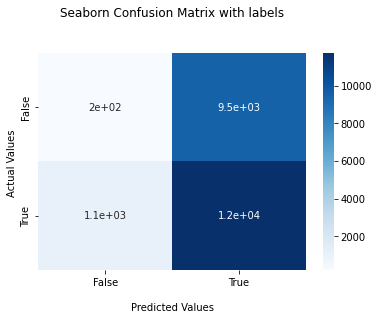

0.5525969138125706
0.9152965012078236


In [162]:
cm_if_test = confusion_matrix (kdd_test_y["class_binary"], y_pred_if_test)
print(cm_if_test)
ax = sns.heatmap(cm_if_test, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_if = cm_if_test[0][0]
FN_if = cm_if_test[1][0]
FP_if = cm_if_test[0][1]
TP_if = cm_if_test[1][1]

##Precision and Recall
Precision_if_test = TP_if/(TP_if+FP_if)
Recall_if_test = TP_if/(TP_if+FN_if)

print (Precision_if_test)
print (Recall_if_test)

# OCSVM without PCA

In [163]:
test_one_hot_data_svm_ss = test_one_hot_data_ss.drop(['p-value'],axis=1)
test_one_hot_data_svm = test_one_hot_data_pca.drop(['p-value'],axis=1)

In [164]:
test_one_hot_data_svm_ss

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,0,0
22540,-0.155534,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,0,0,0,0,0,0,0,0,0,0
22541,-0.155534,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,...,0,0,0,0,0,0,0,0,0,0
22542,-0.155534,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0,0,0,0,0,0,0,0,0,0


In [165]:
model_svm_ss_test = joblib.load('model_svm_ss.sav')
y_pred_svm_test_ss = model_svm_ss_test.predict(test_one_hot_data_svm_ss)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


In [166]:
y_pred_svm_test_ss = np.where(y_pred_svm_test_ss == -1, 0, y_pred_svm_test_ss)
test_acc_svm_ss = accuracy_score(kdd_test_y['class_binary'], y_pred_svm_test_ss)
print("Training accuracy: {:.4f}".format(test_acc_svm_ss))
cm_svm_test_ss = confusion_matrix (kdd_test_y["class_binary"], y_pred_svm_test_ss)
print(cm_svm_test_ss)

Training accuracy: 0.3598
[[1427 8284]
 [6149 6684]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

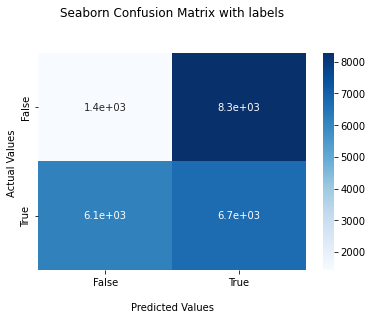

Precision:  0.4465526456440406
Recall 0.520844697264864


In [167]:
ax = sns.heatmap(cm_svm_test_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_svm = cm_svm_test_ss[0][0]
FN_svm = cm_svm_test_ss[1][0]
FP_svm = cm_svm_test_ss[0][1]
TP_svm = cm_svm_test_ss[1][1]


##Precision and Recall
Precision_svm_test_ss = TP_svm/(TP_svm+FP_svm)
Recall_svm_test_ss = TP_svm/(TP_svm+FN_svm)

print ("Precision: ",Precision_svm_test_ss)
print ("Recall",Recall_svm_test_ss)

# OCSVM Testing with PCA

In [168]:
model_svm = joblib.load('model_svm_pca.sav')
y_pred_svm_test = model_svm.predict(test_one_hot_data_svm)

y_pred_svm_test = np.where(y_pred_svm_test == -1, 0, y_pred_svm_test)
test_acc_svm = accuracy_score(kdd_test_y['class_binary'], y_pred_svm_test)
print("Training accuracy: {:.4f}".format(test_acc_svm))
cm_svm_test = confusion_matrix (kdd_test_y["class_binary"], y_pred_svm_test)
print(cm_svm_test)

Training accuracy: 0.5952
[[5659 4052]
 [5074 7759]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

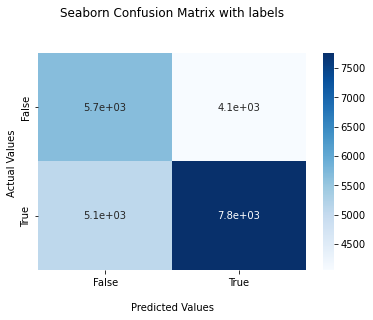

Precision:  0.6569299805266278
Recall 0.6046131068339438


In [169]:
ax = sns.heatmap(cm_svm_test, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


## FP,FN,TP,TN
TN_svm = cm_svm_test[0][0]
FN_svm = cm_svm_test[1][0]
FP_svm = cm_svm_test[0][1]
TP_svm = cm_svm_test[1][1]


##Precision and Recall
Precision_svm_test = TP_svm/(TP_svm+FP_svm)
Recall_svm_test = TP_svm/(TP_svm+FN_svm)

print ("Precision: ",Precision_svm_test)
print ("Recall",Recall_svm_test)

# Kmean Cluster Testing (Without PCA)

In [170]:
#test_one_hot_data_kmean_ss = test_one_hot_data_ss
test_one_hot_data_kmean_ss = test_one_hot_data_ss.drop(['p-value'],axis=1)

In [171]:
kmean_ss = joblib.load('kmean_ss.sav')

In [172]:
kmean_test_result_ss = kmean_ss.predict(test_one_hot_data_kmean_ss)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [173]:
kmean_test_result_ss_c = kmean_test_result_ss

In [174]:
count_1 = np.count_nonzero(kmean_test_result_ss==1)
count_0 = kmean_test_result_ss.shape[0] - np.count_nonzero(kmean_test_result_ss==1)

In [175]:
count_1
count_0 
kmean_test_result_ss_c

2574

19970

array([0, 0, 0, ..., 0, 0, 0])

In [176]:
#if 1 > 0, then change 1 to 0 and 0 to 1
# if(count_1 > count_0):
kmean_test_result_ss = np.where(kmean_test_result_ss_c ==1, 0, kmean_test_result_ss)
kmean_test_result_ss = np.where(kmean_test_result_ss_c ==0, 1, kmean_test_result_ss)

In [177]:
test_acc_kmean_ss = accuracy_score(kdd_test_y['class_binary'], kmean_test_result_ss)
print("Training accuracy: {:.4f}".format(test_acc_kmean_ss))
cm_kmean_test_ss = confusion_matrix (kdd_test_y["class_binary"], kmean_test_result_ss)
print(cm_kmean_test_ss)

Training accuracy: 0.4569
[[   21  9690]
 [ 2553 10280]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

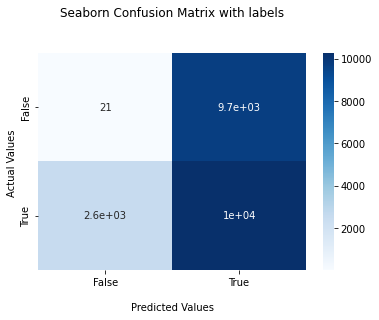

Precision:  0.514772158237356
Recall 0.8010597677861763


In [178]:
    ax = sns.heatmap(cm_kmean_test_ss, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()


    ## FP,FN,TP,TN
    TN_kmean = cm_kmean_test_ss[0][0]
    FN_kmean = cm_kmean_test_ss[1][0]
    FP_kmean = cm_kmean_test_ss[0][1]
    TP_kmean = cm_kmean_test_ss[1][1]


    ##Precision and Recall
    Precision_kmean_test_ss = TP_kmean/(TP_kmean+FP_kmean)
    Recall_kmean_test_ss = TP_kmean/(TP_kmean+FN_kmean)

    print ("Precision: ",Precision_kmean_test_ss)
    print ("Recall",Recall_kmean_test_ss)

# Kmean Clustering Testing (With PCA)

In [179]:
kmean_pca = KMeans(n_clusters = 2)

In [180]:
#test_one_hot_data_kmean = test_one_hot_data_pca
test_one_hot_data_kmean = test_one_hot_data_pca.drop(['p-value'],axis=1)

In [181]:
kmean_pca = joblib.load('kmean.sav')

In [182]:
#kmean_pca.fit(test_one_hot_data_kmean)

kmean_test_result = kmean_pca.predict(test_one_hot_data_kmean)
kmean_test_result_c = kmean_test_result

In [183]:
count_1 = np.count_nonzero(kmean_test_result==1)
count_0 = kmean_test_result.shape[0] - np.count_nonzero(kmean_test_result==1)
count_1 
count_0

11731

10813

In [184]:
kmean_test_result

array([0, 0, 1, ..., 1, 0, 0])

In [185]:

kmean_test_result = np.where(kmean_test_result_c ==1, 0, kmean_test_result)
kmean_test_result = np.where(kmean_test_result_c ==0, 1, kmean_test_result)

In [186]:
kmean_test_result
kmean_test_result_c

array([1, 1, 0, ..., 0, 1, 1])

array([0, 0, 1, ..., 1, 0, 0])

In [187]:
test_acc_kmean = accuracy_score(kdd_test_y['class_binary'], kmean_test_result)
print("Training accuracy: {:.4f}".format(test_acc_kmean))
cm_kmean_test = confusion_matrix (kdd_test_y["class_binary"], kmean_test_result)
print(cm_kmean_test)

Training accuracy: 0.7488
[[7889 1822]
 [3842 8991]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

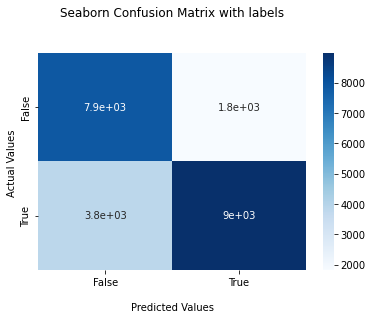

Precision:  0.8314991214279108
Recall 0.7006156004052053


In [188]:
    ax = sns.heatmap(cm_kmean_test, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()


    ## FP,FN,TP,TN
    TN_kmean = cm_kmean_test[0][0]
    FN_kmean = cm_kmean_test[1][0]
    FP_kmean = cm_kmean_test[0][1]
    TP_kmean = cm_kmean_test[1][1]


    ##Precision and Recall
    Precision_kmean_test = TP_kmean/(TP_kmean+FP_kmean)
    Recall_kmean_test = TP_kmean/(TP_kmean+FN_kmean)

    print ("Precision: ",Precision_kmean_test)
    print ("Recall",Recall_kmean_test)

# MCD Testing Without PCA

In [189]:
test_one_hot_data_mcd_ss = test_one_hot_data_ss.drop(['p-value'],axis=1)
model_mcd_ss = joblib.load('model_mcd_ss.sav')

In [190]:
# correct_cov = model_mcd_ss.correct_covariance(test_one_hot_data_mcd_ss)
# correct_cov
#model_mcd_ss = MinCovDet(random_state=42).fit(test_one_hot_data_mcd_ss)


#model_mcd_ss.covariance_

In [191]:
#np.mean(data_array_test_ss,axis = 0)
#sp.linalg.pinv(np.cov(data_array_test_ss, rowvar=False))
#inv_cormat_mcd_ss_test = sp.linalg.pinv(model_mcd_ss.covariance_)
#mu_vect_mcd_ss_test = model_mcd_ss.location_

In [192]:
data_array_test_ss_mcd.shape[0]

22544

In [193]:
data_array_ss

array([[-0.11024922, -0.0076786 , -0.00491864, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11024922, -0.00773737, -0.00491864, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11024922, -0.00776224, -0.00491864, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.11024922, -0.00738219, -0.00482315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11024922, -0.00776224, -0.00491864, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11024922, -0.00773652, -0.00491864, ...,  0.        ,
         0.        ,  0.        ]])

In [194]:
mahal_dist_test_ss = []
for i in range(data_array_test_ss_mcd.shape[0]):
    x_minus_mu_mcd_ss_test = data_array_test_ss_mcd[i,:] - mu_vect_mcd_ss
    left_term_mcd_ss_test = np.dot(x_minus_mu_mcd_ss_test, inv_cormat_mcd_ss)
    mahal = np.dot(left_term_mcd_ss_test, x_minus_mu_mcd_ss_test.T)
    mahal = np.sqrt(mahal)
    mahal_dist_test_ss.append(mahal)

In [195]:
mahal_dist_test_ss

[1564.9815283202263,
 1564.9690320615437,
 1553.8987290180685,
 1561.2168596278225,
 5274.8306765447,
 645.4163473518018,
 518.1475422473976,
 1558.8280989893565,
 399.2491784556383,
 1560.7457877388947,
 1579.0403418140052,
 423.44803496516533,
 1564.9627858427673,
 2026.5875074146732,
 14923.832581418632,
 396.8321821090431,
 403.5981655159003,
 397.3314342312022,
 1560.8223859992613,
 1564.9724660582137,
 1564.9629122956806,
 2027.4917089625244,
 400.0559070400743,
 396.0235656491397,
 1564.9651327752574,
 1418.329323214711,
 432.93632644826863,
 400.78587565534457,
 1554.8776862357895,
 1560.6826577675974,
 5148.8070781938095,
 381.6867594427349,
 827.050505596033,
 1561.999990156944,
 2493.363758486806,
 1565.5904924464332,
 596.2446861367769,
 399.9606231952009,
 1560.7065314316842,
 4756.250777623743,
 2027.0752396346797,
 412.55686910482456,
 470.54708189265244,
 395.5162364669687,
 1418.450715027415,
 400.5401149136358,
 2027.1038000780748,
 2699.5022972909637,
 10089.98767099

In [196]:
#np.mean(test_one_hot_data_mcd_ss)

from scipy.stats import chi2
test_one_hot_data_mcd_ss['p-value_mcd'] =  1 - chi2.cdf(mahal_dist_test_ss, df = 121)#pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(test_one_hot_data_mcd_ss['p-value_mcd'] < 0.01))

22544


In [197]:
pvalue_mcd = test_one_hot_data_mcd_ss['p-value_mcd']
bi_pvalue_mcd = pvalue_mcd

bi_pvalue_mcd = np.where(pvalue_mcd < 0.01, 1, bi_pvalue_mcd)
bi_pvalue_mcd = np.where(pvalue_mcd >= 0.01, 0, bi_pvalue_mcd)

In [198]:
from sklearn.metrics import accuracy_score

test_acc_maha_mcd_ss = accuracy_score(kdd_test_y['class_binary'], bi_pvalue_mcd)
print("Training accuracy: {:.4f}".format(test_acc_maha_mcd_ss))
cm_maha_mcd_test_ss = confusion_matrix (kdd_test_y["class_binary"], bi_pvalue_mcd)
print(cm_maha_mcd_test_ss)

Training accuracy: 0.5692
[[    0  9711]
 [    0 12833]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

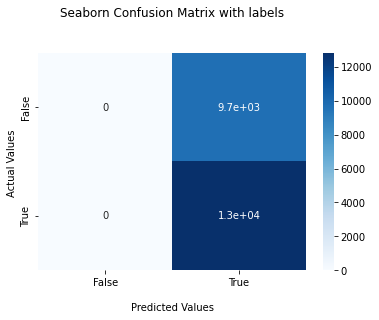

0.5692423704755145
1.0


In [199]:
ax = sns.heatmap(cm_maha_mcd_test_ss, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_maha_mcd = cm_maha_mcd_test_ss[0][0]
FN_maha_mcd = cm_maha_mcd_test_ss[1][0]
FP_maha_mcd = cm_maha_mcd_test_ss[0][1]
TP_maha_mcd = cm_maha_mcd_test_ss[1][1]

##Precision and Recall
Precision_maha_mcd_test_ss = TP_maha_mcd/(TP_maha_mcd+FP_maha_mcd)
Recall_maha_mcd_test_ss = TP_maha_mcd/(TP_maha_mcd+FN_maha_mcd)

print (Precision_maha_mcd_test_ss)
print (Recall_maha_mcd_test_ss)

## MCD after PCA 

In [200]:
test_one_hot_data_pca

,Variable 0,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,...,Variable 16,Variable 17,Variable 18,Variable 19,Variable 20,Variable 21,Variable 22,Variable 23,Variable 24,p-value
0,1.678471,-0.872735,0.004462,0.120732,-0.347212,0.492001,0.395315,0.513245,-0.766786,-0.062394,...,-0.038879,0.089036,0.014807,-0.188965,-0.241500,0.056344,0.496597,0.262535,0.138204,0.121942
1,1.650825,-0.871036,0.022690,0.353080,-0.343112,0.335960,0.348479,0.469322,-0.854539,-0.026489,...,-0.010820,0.145412,-0.009779,-0.598954,-0.375644,0.079031,0.296606,-0.032011,0.186756,0.120080
2,-0.427776,-0.027269,-0.060373,-0.582328,0.404469,-0.682267,-0.200591,-0.123556,-0.589345,0.143091,...,0.104160,0.405106,-0.178831,-1.405561,-1.652676,0.167201,-0.245086,-0.561353,0.150038,0.101557
3,-0.761174,-0.208430,-0.118920,-1.318459,0.976188,-3.314351,0.566546,1.467813,-0.909150,-0.158967,...,0.286518,-1.667154,0.537779,-0.640795,0.353723,-0.069583,-0.619479,0.387528,0.831724,0.024577
4,0.598909,-0.747321,0.025752,0.710066,-0.131553,-1.442168,0.498369,0.965455,-0.426953,-0.115364,...,0.298524,-1.560845,0.244328,0.749042,-1.549601,-0.039347,-1.910045,1.245585,-1.708141,0.033670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.677682,-0.135917,-0.011245,0.455168,-0.042929,-0.256884,-0.100001,-0.189835,0.184557,-0.148046,...,0.011649,0.372109,-0.168500,0.037980,-0.879584,0.102358,0.689768,0.934646,0.090175,0.171562
22540,-0.872991,-0.194655,-0.066623,0.452831,-0.413141,0.185445,0.112065,0.035403,0.523128,-0.197381,...,0.030962,0.042610,-0.075227,0.008424,0.335099,-0.003818,-0.023344,0.180433,0.502189,0.234596
22541,-0.814737,-0.235138,0.074933,0.712311,0.369909,0.794684,-0.066708,0.487747,0.673540,0.041892,...,-0.006817,-0.122758,-0.063017,-0.370471,0.833983,-0.274270,-0.387862,-0.042794,0.810304,0.141849
22542,-0.618400,-0.099512,-0.112588,-0.139796,-0.299245,0.215218,-0.019459,-0.011095,0.042120,-0.007059,...,0.188055,-0.449203,0.018747,-1.882968,0.507418,0.082627,-0.368312,0.264881,-2.206890,0.067002


In [201]:
test_one_hot_data_mcd = test_one_hot_data_pca.drop(['p-value'],axis=1)


In [202]:
test_one_hot_data_mcd

,Variable 0,Variable 1,Variable 2,Variable 3,Variable 4,Variable 5,Variable 6,Variable 7,Variable 8,Variable 9,...,Variable 15,Variable 16,Variable 17,Variable 18,Variable 19,Variable 20,Variable 21,Variable 22,Variable 23,Variable 24
0,1.678471,-0.872735,0.004462,0.120732,-0.347212,0.492001,0.395315,0.513245,-0.766786,-0.062394,...,0.087559,-0.038879,0.089036,0.014807,-0.188965,-0.241500,0.056344,0.496597,0.262535,0.138204
1,1.650825,-0.871036,0.022690,0.353080,-0.343112,0.335960,0.348479,0.469322,-0.854539,-0.026489,...,0.114283,-0.010820,0.145412,-0.009779,-0.598954,-0.375644,0.079031,0.296606,-0.032011,0.186756
2,-0.427776,-0.027269,-0.060373,-0.582328,0.404469,-0.682267,-0.200591,-0.123556,-0.589345,0.143091,...,0.237438,0.104160,0.405106,-0.178831,-1.405561,-1.652676,0.167201,-0.245086,-0.561353,0.150038
3,-0.761174,-0.208430,-0.118920,-1.318459,0.976188,-3.314351,0.566546,1.467813,-0.909150,-0.158967,...,-0.645065,0.286518,-1.667154,0.537779,-0.640795,0.353723,-0.069583,-0.619479,0.387528,0.831724
4,0.598909,-0.747321,0.025752,0.710066,-0.131553,-1.442168,0.498369,0.965455,-0.426953,-0.115364,...,-0.743817,0.298524,-1.560845,0.244328,0.749042,-1.549601,-0.039347,-1.910045,1.245585,-1.708141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.677682,-0.135917,-0.011245,0.455168,-0.042929,-0.256884,-0.100001,-0.189835,0.184557,-0.148046,...,0.292904,0.011649,0.372109,-0.168500,0.037980,-0.879584,0.102358,0.689768,0.934646,0.090175
22540,-0.872991,-0.194655,-0.066623,0.452831,-0.413141,0.185445,0.112065,0.035403,0.523128,-0.197381,...,0.052441,0.030962,0.042610,-0.075227,0.008424,0.335099,-0.003818,-0.023344,0.180433,0.502189
22541,-0.814737,-0.235138,0.074933,0.712311,0.369909,0.794684,-0.066708,0.487747,0.673540,0.041892,...,-0.258330,-0.006817,-0.122758,-0.063017,-0.370471,0.833983,-0.274270,-0.387862,-0.042794,0.810304
22542,-0.618400,-0.099512,-0.112588,-0.139796,-0.299245,0.215218,-0.019459,-0.011095,0.042120,-0.007059,...,-0.290904,0.188055,-0.449203,0.018747,-1.882968,0.507418,0.082627,-0.368312,0.264881,-2.206890


In [203]:
model_mcd = joblib.load('model_mcd.sav')
model_mcd.fit(test_one_hot_data_mcd)

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-291.443903870860254 > -291.566629413627538). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-255.702549906992772 > -256.643533473852926). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-259.155754523529708 > -261.055149168852552). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-256.230996498976879 > -257.666977120110346). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-264.320253142370461 > -265.179776833615165). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-293.906291933718876 > -294.947289214843408). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-272.940466898042530 > -273.081618261848064). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-267.332543982469019 > -268.431035732898749). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-267.176987355008521 > -268.112375376544719). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn

C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-311.913033908827686 > -315.594579847379464). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-297.737629447110066 > -298.358401811520366). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
C:\WINDOWS\system32\myenv\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-297.584713884114876 > -299.050413194525163). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn

MinCovDet(random_state=42)

In [204]:
#correct_cov_pca = model_mcd.correct_covariance(test_one_hot_data_mcd)

In [205]:
np.mean(data_array_test,axis = 0)
sp.linalg.pinv(np.cov(data_array_test, rowvar=False))
inv_cormat_pca_test = sp.linalg.pinv(model_mcd.covariance_)
mu_vect_pca_test = model_mcd.location_

array([-1.79052026e-16, -1.23723088e-16,  8.12369834e-17, -1.47676800e-16,
        3.20186986e-16,  2.17169158e-16, -2.57887759e-16,  1.87894314e-16,
        2.04177815e-17, -2.15455364e-18, -2.63136252e-16, -5.93336987e-16,
        4.23609870e-17,  2.73645549e-16,  5.01252596e-16,  4.76464148e-16,
       -4.97877949e-16, -8.25772697e-17,  1.46356982e-16,  1.01078853e-15,
       -4.62473093e-16, -1.20191821e-15, -6.37058421e-17, -8.90778658e-17,
       -2.88891786e-15])

array([[ 1.00000000e+00, -2.47979194e-16, -1.14257970e-18,
        -7.76166210e-18, -1.98178479e-17, -2.96676729e-17,
        -4.35362265e-18, -5.90989500e-19, -1.59764161e-17,
        -6.01331816e-18,  1.18936637e-17, -1.31987655e-18,
         2.23714150e-18,  2.71362679e-18, -1.29943816e-17,
         1.49717340e-18, -3.13224435e-18,  4.26743668e-18,
         1.14257970e-18,  3.30954120e-18,  2.20636080e-18,
         4.51121985e-18, -1.57597200e-18, -1.00468215e-17,
        -5.90989500e-19],
       [ 2.47979194e-16,  1.00000000e+00,  4.42540409e-16,
        -3.19929179e-18,  2.27276972e-16,  1.68494703e-16,
         2.58650051e-16, -5.94108416e-17,  1.13263913e-16,
         3.35980071e-17,  3.80301657e-17, -5.50041609e-17,
         2.47735335e-17,  1.02204502e-16, -1.36941923e-16,
        -7.35362627e-17,  6.26819517e-17, -1.29721072e-17,
        -4.96234282e-17,  1.60437120e-17, -2.43885726e-17,
        -1.48017182e-17, -1.94225066e-17,  7.57483058e-17,
        -6.50521303e-18],
    

In [206]:
mahal_dist_test = []
for i in range(data_array_test_mcd.shape[0]):
    x_minus_mu_pca_test = data_array_test[i,:] - mu_vect_mcd_pca
    left_term_pca_test = np.dot(x_minus_mu_pca_test, inv_cormat_mcd_pca)
    mahal = np.dot(left_term_pca_test, x_minus_mu_pca_test.T)
    mahal = np.sqrt(mahal)
    mahal_dist_test.append(mahal)

In [207]:
np.mean(test_one_hot_data_mcd)

from scipy.stats import chi2
test_one_hot_data_mcd['p-value_mcd'] = 1 - chi2.cdf(mahal_dist_test, df = 24) #pdf(x, degreeOfFreedom = Number of Variables)

#Calculate number of p-value less than 0.01
print(np.count_nonzero(test_one_hot_data_mcd['p-value_mcd'] < 0.01))

C:\WINDOWS\system32\myenv\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Variable 0    -1.747675e-16
Variable 1    -1.188230e-16
Variable 2     9.959701e-17
Variable 3    -1.418312e-16
Variable 4     3.082464e-16
Variable 5     2.061280e-16
Variable 6    -2.467863e-16
Variable 7     2.017155e-16
Variable 8     2.143227e-17
Variable 9     3.151804e-19
Variable 10   -2.636484e-16
Variable 11   -5.846597e-16
Variable 12    4.790742e-17
Variable 13    2.671154e-16
Variable 14    5.421103e-16
Variable 15    4.412526e-16
Variable 16   -4.907359e-16
Variable 17   -8.730498e-17
Variable 18    1.553839e-16
Variable 19    1.037259e-15
Variable 20   -4.888448e-16
Variable 21   -1.196740e-15
Variable 22   -5.168959e-17
Variable 23   -8.320763e-17
Variable 24   -2.868772e-15
dtype: float64

22544


In [208]:
pvalue_mcd = test_one_hot_data_mcd['p-value_mcd']
bi_pvalue_mcd = pvalue_mcd

bi_pvalue_mcd = np.where(pvalue_mcd < 0.01, 1, bi_pvalue_mcd)
bi_pvalue_mcd = np.where(pvalue_mcd >= 0.01, 0, bi_pvalue_mcd)

In [209]:
from sklearn.metrics import accuracy_score

test_acc_maha_mcd = accuracy_score(kdd_test_y['class_binary'], bi_pvalue_mcd)
print("Training accuracy: {:.4f}".format(test_acc_maha_mcd))
cm_maha_mcd_test = confusion_matrix (kdd_test_y["class_binary"], bi_pvalue_mcd)
print(cm_maha_mcd_test)

Training accuracy: 0.5692
[[    0  9711]
 [    0 12833]]


Text(0.5, 1.0, 'Seaborn Confusion Matrix with labels\n\n')

Text(0.5, 15.0, '\nPredicted Values')

Text(33.0, 0.5, 'Actual Values ')

[Text(0.5, 0, 'False'), Text(1.5, 0, 'True')]

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

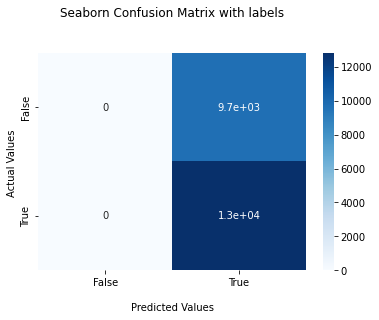

0.5692423704755145
1.0


In [210]:
ax = sns.heatmap(cm_maha_mcd_test, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## FP,FN,TP,TN
TN_maha_mcd = cm_maha_mcd_test[0][0]
FN_maha_mcd = cm_maha_mcd_test[1][0]
FP_maha_mcd = cm_maha_mcd_test[0][1]
TP_maha_mcd = cm_maha_mcd_test[1][1]

##Precision and Recall
Precision_maha_mcd_test = TP_maha_mcd/(TP_maha_mcd+FP_maha_mcd)
Recall_maha_mcd_test = TP_maha_mcd/(TP_maha_mcd+FN_maha_mcd)

print (Precision_maha_mcd_test)
print (Recall_maha_mcd_test)

# Testing Result Comparison
## Without PCA

In [211]:
header_cmp = ['Algorithm','accuracy', 'recall', 'precision']
table_cmp = [['Mahalanobis', test_acc_maha_ss, Recall_maha_test_ss, Precision_maha_test_ss],
             ['Maha + MCD', test_acc_maha_mcd_ss, Recall_maha_mcd_test_ss, Precision_maha_mcd_test_ss],
             ['IF', test_acc_if_ss, Recall_if_test_ss, Precision_if_test_ss],
             ['OCSVM', test_acc_svm_ss, Recall_svm_test_ss, Precision_svm_test_ss],
             ['Kmean', test_acc_kmean_ss, Recall_kmean_test_ss, Precision_kmean_test_ss]]
comparison_ss_test = pd.DataFrame(table_cmp,columns=header_cmp)
comparison_ss_test

,Algorithm,accuracy,recall,precision
0,Mahalanobis,0.893187,0.985584,0.850514
1,Maha + MCD,0.569242,1.000000,0.569242
2,IF,0.455687,0.792722,0.514203
3,OCSVM,0.359785,0.520845,0.446553
4,Kmean,0.456929,0.801060,0.514772


## After PCA

In [212]:
header_cmp = ['Algorithm','accuracy', 'recall', 'precision']
table_cmp = [['Mahalanobis', test_acc_maha, Recall_maha_test, Precision_maha_test],
             ['Maha + MCD', test_acc_maha_mcd, Recall_maha_mcd_test, Precision_maha_mcd_test],
             ['IF', test_acc_if, Recall_if_test, Precision_if_test],
             ['OCSVM', test_acc_svm, Recall_svm_test, Precision_svm_test],
             ['Kmean', test_acc_kmean, Recall_kmean_test, Precision_kmean_test]]
comparison_test = pd.DataFrame(table_cmp,columns=header_cmp)
comparison_test

,Algorithm,accuracy,recall,precision
0,Mahalanobis,0.462828,0.073327,0.811907
1,Maha + MCD,0.569242,1.000000,0.569242
2,IF,0.529941,0.915297,0.552597
3,OCSVM,0.595192,0.604613,0.656930
4,Kmean,0.748758,0.700616,0.831499
